### The dataset I am scrapping is from news api about news article about asthma and if possible covering area of California attached to it. So, I am passing parameters as to be both Asthma related and in the area of California. 

In [23]:
import requests
url = 'https://newsapi.org/v2/everything'

params = {'q': 'asthma AND california',
    'apiKey': "d4a8ed55ba264ae89c11c1e3f7ee595b",
          "language": "en"
               }

request = requests.get(url,params)
data = request.json()

In [24]:
data

{'status': 'ok',
 'totalResults': 75,
 'articles': [{'source': {'id': 'time', 'name': 'Time'},
   'author': 'Markham Heid',
   'title': 'The Most Exciting New Advances in Managing COPD',
   'description': 'From innovative new lung valves to refinements in the deployment of inhaled therapies and vaccines, the landscape of COPD care and treatment is changing.',
   'url': 'https://time.com/6903546/copd-treatment-advances/',
   'urlToImage': 'https://api.time.com/wp-content/uploads/2024/03/GettyImages-1210786663.jpg?quality=85',
   'publishedAt': '2024-03-18T14:55:58Z',
   'content': 'The Global Initiative for Chronic Obstructive Lung Disease, or GOLD, is the worlds preeminent COPD research and advocacy organization. Founded in 1997 in collaboration with the U.S. National Institut… [+11161 chars]'},
  {'source': {'id': None, 'name': 'Yahoo Entertainment'},
   'author': 'ELLIOT SPAGAT',
   'title': "Judge questions Border Patrol stand that it's not required to care for children at migrant c

In [25]:
title = []
description = []
source = []
date_published = []
content = []

In [26]:
import re
from datetime import datetime

#Doing this because we want to insert Null value if we find nothing as title, description, source, date or content
for article in data["articles"]:
    title_text = article.get("title", None)
    description_text = article.get("description", None)
    source_text = article["source"].get("name", None)
    date_published_text = article.get("publishedAt", None)
    content_text = article.get("content", None)

    if title_text is not None:
        title.append(re.sub(r"[^A-Za-z\-]", " ", title_text))
    else:
        title.append(None)

    if description_text is not None:
        description.append(re.sub(r"[^A-Za-z\-]", " ", description_text))
    else:
        description.append(None)

    if source_text is not None:
        source.append(re.sub(r"[^A-Za-z\-]", " ", source_text))
    else:
        source.append(None)
        
    if date_published_text is not None:
        date_pattern = r'^(\d{4}-\d{2}-\d{2})'
        
        match = re.search(date_pattern, date_published_text)

        if match:
            # Extract the date from the matched group
            dt = match.group(1)
            date_published.append(dt)
        else:
            continue
    else:
        date_published.append(None)

    if content_text is not None:
        content.append(re.sub(r"[^A-Za-z\-]", " ", content_text))
    else:
        content.append(None)

In [27]:
content #this has last ending with 'chars ' which needs to be removed else can be a outlier in the visualizations

['The Global Initiative for Chronic Obstructive Lung Disease  or GOLD  is the worlds preeminent COPD research and advocacy organization  Founded in      in collaboration with the U S  National Institut          chars ',
 'SAN DIEGO  AP  A federal judge on Friday sharply questioned the Biden administration s position that it bears no responsibility for housing and feeding migrant children while they wait in makeshift c         chars ',
 'A new study finds that policies to reduce carbon dioxide  CO   emissions from motor vehicles combined with investments in electric vehicles and public transportation would reduce air pollution and br         chars ',
 'Yoshiki s involvement in philanthropy encompasses a diverse range of causes  with his family and upbringing being core influences    I lost my father when I was young   Yoshiki says   He actually too         chars ',
 'Two chemicals found in common household products like disinfectants and furniture may play a role in the development of n

In [28]:
for i in range(len(content)):
    content[i] = content[i].replace("chars ", "")
    
content

['The Global Initiative for Chronic Obstructive Lung Disease  or GOLD  is the worlds preeminent COPD research and advocacy organization  Founded in      in collaboration with the U S  National Institut          ',
 'SAN DIEGO  AP  A federal judge on Friday sharply questioned the Biden administration s position that it bears no responsibility for housing and feeding migrant children while they wait in makeshift c         ',
 'A new study finds that policies to reduce carbon dioxide  CO   emissions from motor vehicles combined with investments in electric vehicles and public transportation would reduce air pollution and br         ',
 'Yoshiki s involvement in philanthropy encompasses a diverse range of causes  with his family and upbringing being core influences    I lost my father when I was young   Yoshiki says   He actually too         ',
 'Two chemicals found in common household products like disinfectants and furniture may play a role in the development of neurological disorders li

In [29]:
import pandas as pd

d = {'title' : title,
'description' : description,
'source' : source,
'date_published' : date_published,
'content' : content
    }

df = pd.DataFrame(d)

In [30]:
df.head()

title  \
0    The Most Exciting New Advances in Managing COPD   
1  Judge questions Border Patrol stand that it s ...   
2  Climate policies to reduce motor vehicle emiss...   
3  Yoshiki s Charitable Efforts Tackle Mental Hea...   
4  Chemicals Found In Popular Household Products ...   

                                         description               source  \
0  From innovative new lung valves to refinements...                 Time   
1  A federal judge on Friday sharply questioned t...  Yahoo Entertainment   
2  A new study finds that policies to reduce carb...             Phys Org   
3  Yoshiki s involvement in philanthropy encompas...              Variety   
4  That s how many people globally have multiple ...               Forbes   

  date_published                                            content  
0     2024-03-18  The Global Initiative for Chronic Obstructive ...  
1     2024-03-29  SAN DIEGO  AP  A federal judge on Friday sharp...  
2     2024-03-12  A new study finds that policies to reduce carb...  
3     2024-03-27  Yoshiki s involvement in philanthropy encompas...  
4     2024-03-25  Two chemicals found in common household produc...

In [31]:
df['date_published'] = pd.to_datetime(df.date_published, format='%Y-%m-%d')

In [32]:
len(df)

75

In [33]:
#Let's check for any missing value and if found any, let's deal with it
df.isna().sum() # No missing value found and hence the data is ready for visualization!

title             0
description       0
source            0
date_published    0
content           0
dtype: int64

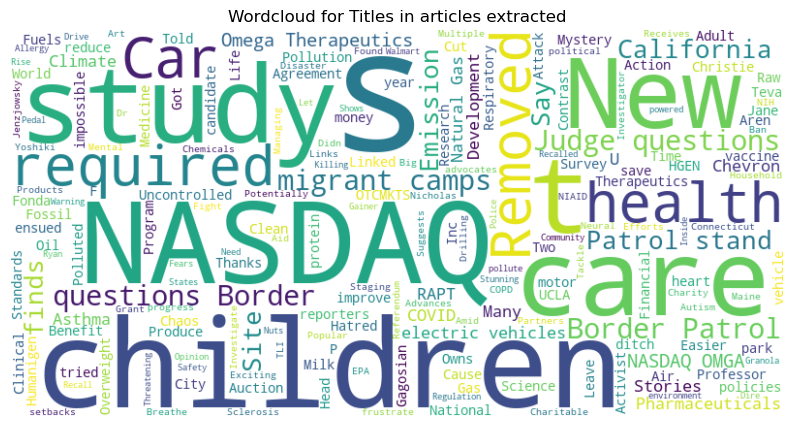

In [34]:
# Let's make word clouds of Title, Description and content, so we can depict or bring some conclusions on which words 
# or terms are being used more as a part of news on Asthma and California

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(df['title']))

#Word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Wordcloud for Titles in articles extracted")
plt.axis('off')
plt.show()

From the titles we can see that Engines, smoke, emissions, trucks, Health, vaping, these words are repeating themselves. We can slightly move towards hypothesis that might be because of Pollution or due to some fire hazard or people leading to smoking or vaping might be some reasons behind Asthma being the cases in California

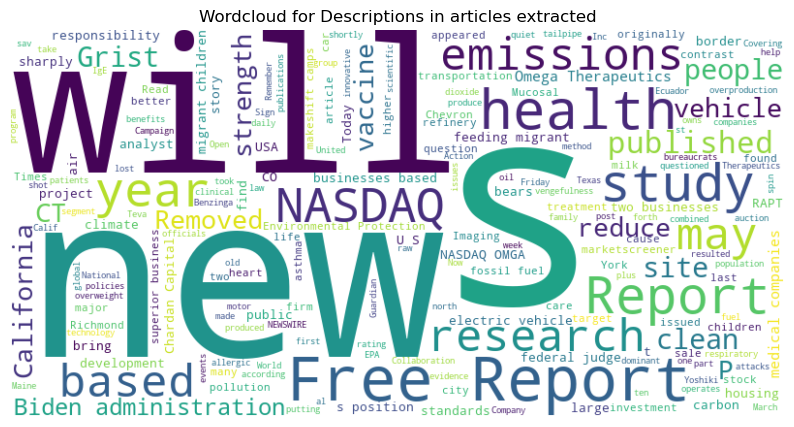

In [35]:
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(df['description']))

#Word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Wordcloud for Descriptions in articles extracted")
plt.axis('off')
plt.show()

Moving to description, we can see that words like federal, company, trucks and settlement are the words coming more often. Now, this might be because of some legal lawsuit filed against company or company leading to settlements because of their mistakes, that made several age groups caused asthma in California. These are just rough guesses one can made from the wordcloud based on asthma and california

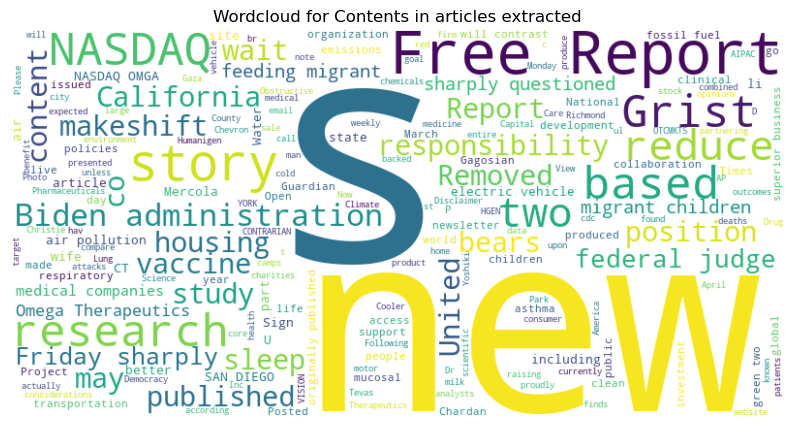

In [36]:
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(df['content']))

#Word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Wordcloud for Contents in articles extracted")
plt.axis('off')
plt.show()

In the content as well, we can see the same things as description. One thing to notice was, Los Angeles and California was included in this list. So, this might be a case where Los Angeles was majorly affected through Asthma or through pollution or some fire hazard that is leading towards the settlement or federal report or lawsuit or something. More clarity can be made once we use other datasets into this and see if the people are getting affected and if yes of which age groups and how serious it is!

In [37]:
#Let's see what are the sources of these news, are they some well knowned or some local news. Well known ones are
#less likely to miss out some details and mostly gives us some credible news

#Let's first see how many sources are there

df['source'].unique()  #These are so many of them... Lets see the top ones.. 

array(['Time', 'Yahoo Entertainment', 'Phys Org', 'Variety', 'Forbes',
       'Science Daily', 'Nakedcapitalism com', ' Removed ', 'ARTnews',
       'Observer', 'Energycentral com', 'GlobeNewswire', 'Newsweek',
       'Prismreports org', 'Naturalnews com', 'Allthatsinteresting com',
       'Quartz India', 'Gizmodo com', 'Wattsupwiththat com',
       'Minneapolis Star Tribune', 'Marketscreener com', 'Desmog com',
       'CleanTechnica', 'Grist', 'NPR', 'Smithsonian com',
       'ETF Daily News', 'Lewrockwell com', 'InvestorsObserver',
       'The BMJ', 'ABC News', 'Mercola com', 'Cdc gov', 'Common Dreams',
       'The New York Review of Books', 'HuffPost', 'Medical News Today',
       'CounterPunch', 'KQED', 'Freerepublic com', 'KPBS',
       'Skepticalscience com', 'Fox News', 'WWD', 'Plos org',
       'Stars and Stripes', 'YES  Magazine', 'CNN'], dtype=object)

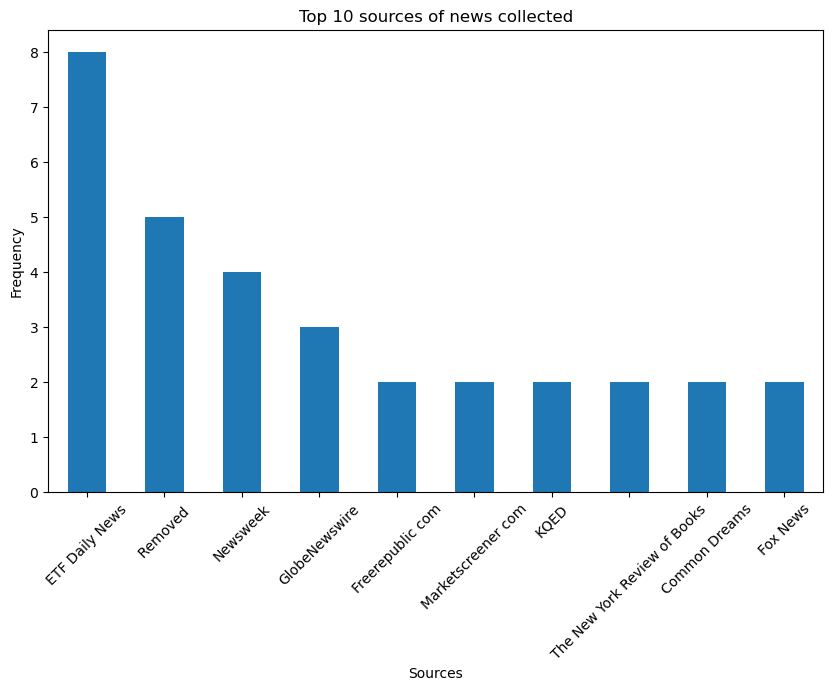

In [38]:
top_10 = df['source'].value_counts().head(10) #Top 10 sources

# Plotting histogram of them
plt.figure(figsize=(10, 6))
top_10.plot(kind='bar')
plt.title('Top 10 sources of news collected')
plt.xlabel('Sources')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The news sources listed as well as the top 10 sources consists of names like ABC News, Los Angeles Times, CNN, Time, Fox News and much more which are quite famous and so we can say that data is credible or atleast there are less chances that the news are some made up things just for the sake of increasing the view counts. Since the data is only 96 rows, its not enough to generate some conclusion or reach to a one...

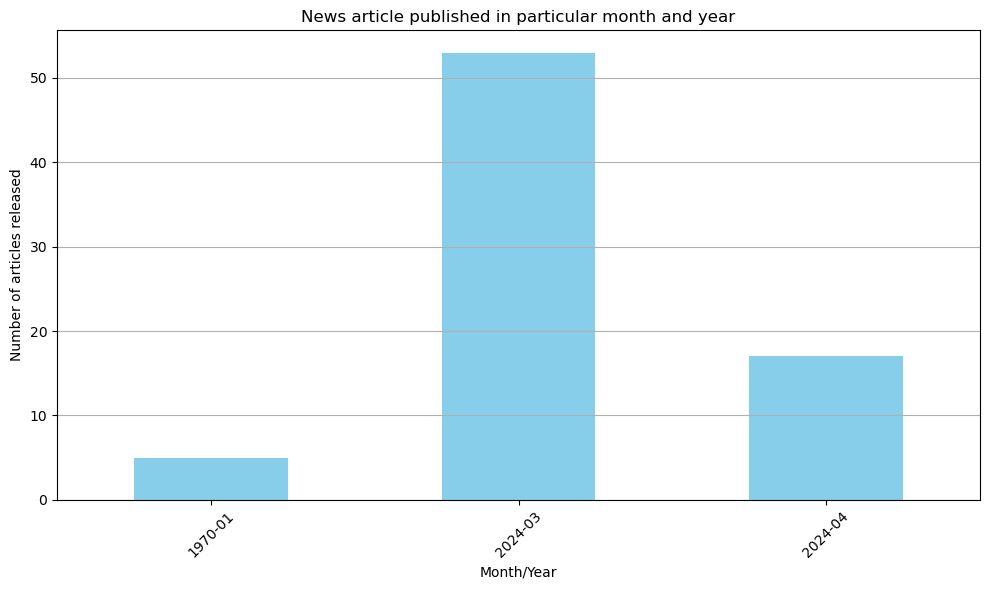

In [39]:
# Now lets see about the date on which these news were listed to know when these incidents happen
# We might also relate date as a factor of knowing that patients died on certain time span or what led to Asthma
# in California such a serious issue and form a conclusion.

df['month_year'] = df['date_published'].dt.to_period('M') #adding this so that we can sort by month-year

monthly_counts = df.groupby('month_year').size() #These counts the news article in a particular month

# Lets visualize this by line plot
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('News article published in particular month and year')
plt.xlabel('Month/Year')
plt.ylabel('Number of articles released')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Now, there are couple of things to notice or can make a path for our further analysis.
- One is there are couple of articles from Jan 1970, which are mostly outliers and can be neglected as they won't matter in the analysis or have any say in our analysis
- Majorly the data or the articles are from 2024 Jan and Feb. So we might wanna go towards past 5-10 years of data of Asthma patients or their effects to know how serious things were because having only 96 data points and that too only from 2024 Jan and Feb, doesn't tell us why Asthma in California is a major issue at the first place. Past 5-10 years of data can help us know how seriously people were affected, which age groups were affected and we can come to a conclusion based on that.

### Now, let's move to our next datasets. I am planning to import datasets of same time span which I found from data.gov specifically in California

So I got following datasets. Let's get them ready and do some visualizations!!
- Deaths from Asthma from 2014-2019
- Emergency department data on Asthma patients from 2015-2020

What each datasets provide and what are their significance, will be explained part by part and so let's begin!

1st dataset has time span of 2014-2019, but here we can assume as per the data given that things from 2014-2019 must have been same from 2015-2020 to form a conclusion.

In [2]:
# Let's start with deaths from asthma from 2014-2019
import pandas as pd
df_deaths = pd.read_csv('asthma-deaths-by-county-2014_2019.csv', encoding='latin1')
df_deaths.head()

COUNTY      YEARS            STRATA AGE GROUP NUMBER OF DEATHS  \
0  California  2014-2016  Total population  All ages            1,181   
1     Alameda  2014-2016  Total population  All ages               58   
2      Alpine  2014-2016  Total population  All ages                0   
3      Amador  2014-2016  Total population  All ages                0   
4       Butte  2014-2016  Total population  All ages                7   

   AGE-ADJUSTED MORTALITY RATE  \
0                          9.6   
1                         11.2   
2                          0.0   
3                          0.0   
4                          NaN   

                                             COMMENT  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4  Rate not available due to statistical instability

### Let's know more about this dataset.
- County is basically the areas in California
- Years is basically in the time span of. For example 2017-2019, the deaths are recorded in this time span
- Strata column is not needed for our analysis
- Age group. So, for each 3 year time span, they have divided the deaths in 3 age groups - All ages(Adults plus non adults), 0-17(Not adult), 18+(adults) for each area
- Number of deaths which depict the actual number recorded
- Age adjusted mortality rate is basically mortality rate overall in that particularly age group. For example, age mortality for specific group is 9, therfore 9 of 1000 people died in that specific age group due to asthma
- Comment section won't be needed in this analysis.

In [3]:
# Let's remove Strata and comment section from this analysis
df_deaths.drop(columns = ['STRATA','COMMENT'],inplace=True)
df_deaths

COUNTY      YEARS  AGE GROUP NUMBER OF DEATHS  \
0    California  2014-2016   All ages            1,181   
1       Alameda  2014-2016   All ages               58   
2        Alpine  2014-2016   All ages                0   
3        Amador  2014-2016   All ages                0   
4         Butte  2014-2016   All ages                7   
..          ...        ...        ...              ...   
349      Tulare  2017-2019  18+ years               16   
350    Tuolumne  2017-2019  18+ years              NaN   
351     Ventura  2017-2019  18+ years               17   
352        Yolo  2017-2019  18+ years              NaN   
353        Yuba  2017-2019  18+ years              NaN   

     AGE-ADJUSTED MORTALITY RATE  
0                            9.6  
1                           11.2  
2                            0.0  
3                            0.0  
4                            NaN  
..                           ...  
349                         15.5  
350                          NaN  
351                          7.7  
352                          NaN  
353                          NaN  

[354 rows x 5 columns]

In [4]:
# Let's start cleaning. 
df_deaths.dtypes #number of deaths should be integer

COUNTY                          object
YEARS                           object
AGE GROUP                       object
NUMBER OF DEATHS                object
AGE-ADJUSTED MORTALITY RATE    float64
dtype: object

In [5]:
df_deaths['NUMBER OF DEATHS'] = df_deaths['NUMBER OF DEATHS'].str.replace(',','').fillna(0).astype(int)  #Replacing the commas and filling NA's with 0

In [6]:
df_deaths

COUNTY      YEARS  AGE GROUP  NUMBER OF DEATHS  \
0    California  2014-2016   All ages              1181   
1       Alameda  2014-2016   All ages                58   
2        Alpine  2014-2016   All ages                 0   
3        Amador  2014-2016   All ages                 0   
4         Butte  2014-2016   All ages                 7   
..          ...        ...        ...               ...   
349      Tulare  2017-2019  18+ years                16   
350    Tuolumne  2017-2019  18+ years                 0   
351     Ventura  2017-2019  18+ years                17   
352        Yolo  2017-2019  18+ years                 0   
353        Yuba  2017-2019  18+ years                 0   

     AGE-ADJUSTED MORTALITY RATE  
0                            9.6  
1                           11.2  
2                            0.0  
3                            0.0  
4                            NaN  
..                           ...  
349                         15.5  
350                          NaN  
351                          7.7  
352                          NaN  
353                          NaN  

[354 rows x 5 columns]

In [7]:
# Since we replaced the number of deaths having NA values with 0. Let's first deal with it
# Let's see if we can replace it with mean or median
mn = df_deaths.groupby('AGE GROUP')['NUMBER OF DEATHS'].mean()
md = df_deaths.groupby('AGE GROUP')['NUMBER OF DEATHS'].median()

In [8]:
print("Mean is :", mn)
print("\n\nMedian is :",md)  #Therefore mean seems to be a good method.

Mean is : AGE GROUP
0-17 years     1.000000
18+ years     37.415254
All ages      38.949153
Name: NUMBER OF DEATHS, dtype: float64


Median is : AGE GROUP
0-17 years    0.0
18+ years     3.0
All ages      6.0
Name: NUMBER OF DEATHS, dtype: float64


We are moving with mean in this case as we cannot for data retrival team to do the work properly. But in this case, we should always contact the team to provide or change the method of data retrival, as we can clearly see, that data collected from 0-17 age group has mostly 0 values which is not accurate but in this case we replace by mean so that data can be ready for analysis. But the analysis can be better if that data retrival or provided would be better

In [9]:
def fill_zeros(row):  #making a function to fill with age group mean, if found 0 in a particular age group mean
    if row['NUMBER OF DEATHS'] == 0:
        return mn[row['AGE GROUP']]
    else:
        return row['NUMBER OF DEATHS']

# Applying the function
df_deaths['NUMBER OF DEATHS'] = df_deaths.apply(fill_zeros, axis=1)

df_deaths['NUMBER OF DEATHS'] = df_deaths['NUMBER OF DEATHS'].round().astype(int)

In [10]:
df_deaths

COUNTY      YEARS  AGE GROUP  NUMBER OF DEATHS  \
0    California  2014-2016   All ages              1181   
1       Alameda  2014-2016   All ages                58   
2        Alpine  2014-2016   All ages                39   
3        Amador  2014-2016   All ages                39   
4         Butte  2014-2016   All ages                 7   
..          ...        ...        ...               ...   
349      Tulare  2017-2019  18+ years                16   
350    Tuolumne  2017-2019  18+ years                37   
351     Ventura  2017-2019  18+ years                17   
352        Yolo  2017-2019  18+ years                37   
353        Yuba  2017-2019  18+ years                37   

     AGE-ADJUSTED MORTALITY RATE  
0                            9.6  
1                           11.2  
2                            0.0  
3                            0.0  
4                            NaN  
..                           ...  
349                         15.5  
350                          NaN  
351                          7.7  
352                          NaN  
353                          NaN  

[354 rows x 5 columns]

In [11]:
# Now lets deal with age adjusted mortality rate in the same manner

mn1 = df_deaths.groupby('AGE GROUP')['AGE-ADJUSTED MORTALITY RATE'].mean()
md1 = df_deaths.groupby('AGE GROUP')['AGE-ADJUSTED MORTALITY RATE'].median()

In [12]:
print("Mean is :", mn1)
print("\n\nMedian is :",md1)  #Therefore mean seems to be a good method again.

#Again if we could have, we would have asked the data retrieval to be done properly

Mean is : AGE GROUP
0-17 years     0.073864
18+ years     10.732759
All ages       8.218966
Name: AGE-ADJUSTED MORTALITY RATE, dtype: float64


Median is : AGE GROUP
0-17 years     0.00
18+ years     11.90
All ages       9.05
Name: AGE-ADJUSTED MORTALITY RATE, dtype: float64


In [13]:
import math
def fill_zeros1(row):  #making similar function
    if row['AGE-ADJUSTED MORTALITY RATE'] == 0 or math.isnan(row['AGE-ADJUSTED MORTALITY RATE']):
        return mn1[row['AGE GROUP']]
    else:
        return row['AGE-ADJUSTED MORTALITY RATE']

# Applying the function
df_deaths['AGE-ADJUSTED MORTALITY RATE'] = df_deaths.apply(fill_zeros1, axis=1)

df_deaths['AGE-ADJUSTED MORTALITY RATE'] = round(df_deaths['AGE-ADJUSTED MORTALITY RATE'],2) #rounding up to 2 decimals

In [14]:
df_deaths.head()

COUNTY      YEARS AGE GROUP  NUMBER OF DEATHS  \
0  California  2014-2016  All ages              1181   
1     Alameda  2014-2016  All ages                58   
2      Alpine  2014-2016  All ages                39   
3      Amador  2014-2016  All ages                39   
4       Butte  2014-2016  All ages                 7   

   AGE-ADJUSTED MORTALITY RATE  
0                         9.60  
1                        11.20  
2                         8.22  
3                         8.22  
4                         8.22

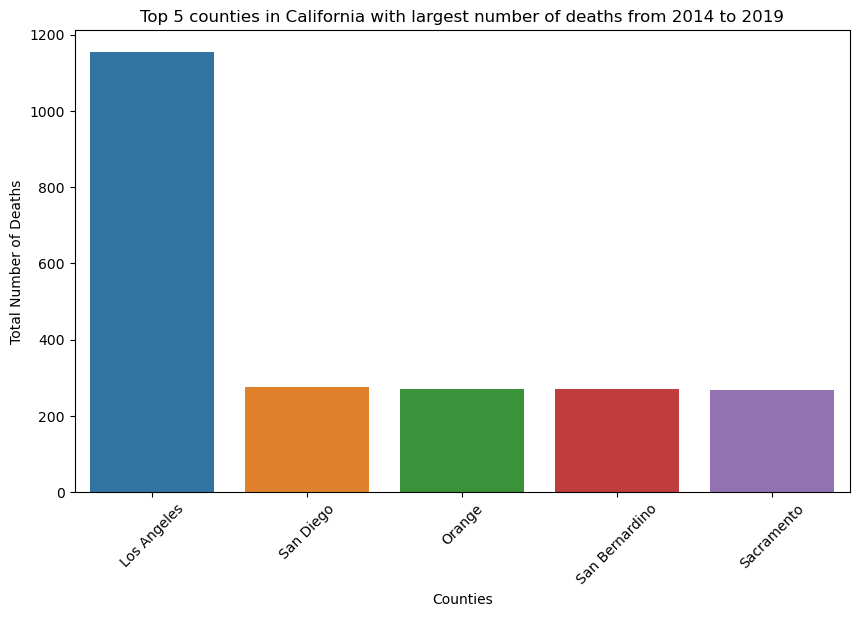

In [15]:
#Now lets visualize this.

#Let's see which are the top 5 counties in California having largest number of deaths
import matplotlib.pyplot as plt
import seaborn as sns

county_deaths = df_deaths.groupby('COUNTY')['NUMBER OF DEATHS'].sum().reset_index()
top_counties = county_deaths.sort_values(by='NUMBER OF DEATHS', ascending=False)
top5 = top_counties.iloc[1:6] #doing this because California is a State and we want it's county's data 

# Plotting it now
plt.figure(figsize=(10, 6))
sns.barplot(x='COUNTY', y='NUMBER OF DEATHS', data=top5)
plt.title('Top 5 counties in California with largest number of deaths from 2014 to 2019')
plt.xlabel('Counties')
plt.ylabel('Total Number of Deaths')
plt.xticks(rotation=45)
plt.show()

Also seen in previous dataset Los Angeles is some place where the Asthma has affected a lot in past years as well and so the number of deaths are high in Los Angeles due to Asthma from 2014-2019

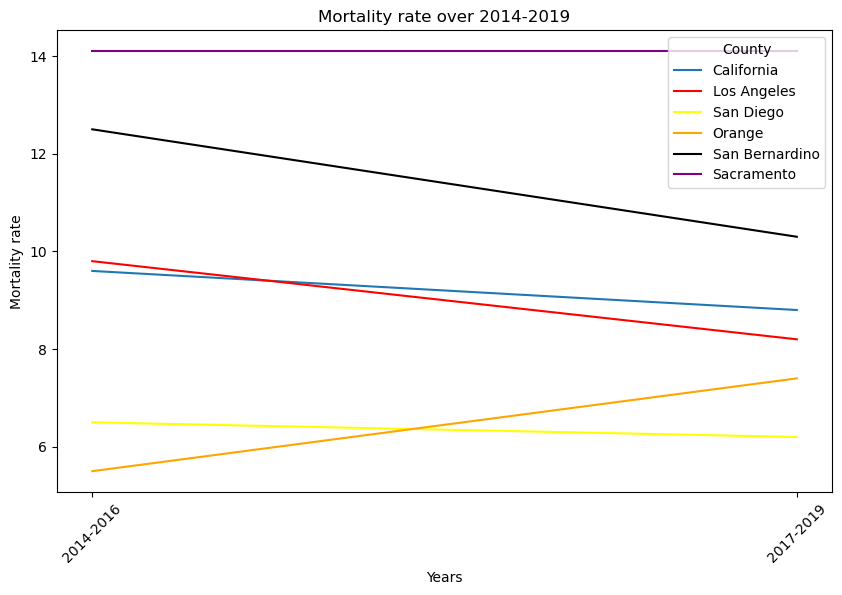

In [15]:
# Now we wanna see the Mortality rate over the years from 2014-2019 for California as a whole and top 5 counties
# Is it increased or decreased?

cali_data = df_deaths[(df_deaths['COUNTY'] == 'California') & (df_deaths['AGE GROUP'] == 'All ages')]
la_data = df_deaths[(df_deaths['COUNTY'] == 'Los Angeles') & (df_deaths['AGE GROUP'] == 'All ages')]
sd_data = df_deaths[(df_deaths['COUNTY'] == 'San Diego') & (df_deaths['AGE GROUP'] == 'All ages')]
o_data = df_deaths[(df_deaths['COUNTY'] == 'Orange') & (df_deaths['AGE GROUP'] == 'All ages')]
sb_data = df_deaths[(df_deaths['COUNTY'] == 'San Bernardino') & (df_deaths['AGE GROUP'] == 'All ages')]
sc_data = df_deaths[(df_deaths['COUNTY'] == 'Sacramento') & (df_deaths['AGE GROUP'] == 'All ages')]

plt.figure(figsize=(10, 6))
sns.lineplot(x='YEARS', y='AGE-ADJUSTED MORTALITY RATE', data=cali_data, label = 'California')
sns.lineplot(x='YEARS', y='AGE-ADJUSTED MORTALITY RATE', data=la_data, color = 'red', label = 'Los Angeles')
sns.lineplot(x='YEARS', y='AGE-ADJUSTED MORTALITY RATE', data=sd_data, color = 'yellow', label = 'San Diego')
sns.lineplot(x='YEARS', y='AGE-ADJUSTED MORTALITY RATE', data=o_data, color = 'orange', label = 'Orange')
sns.lineplot(x='YEARS', y='AGE-ADJUSTED MORTALITY RATE', data=sb_data, color = 'black', label = 'San Bernardino')
sns.lineplot(x='YEARS', y='AGE-ADJUSTED MORTALITY RATE', data=sc_data, color = 'purple', label = 'Sacramento')
plt.title('Mortality rate over 2014-2019')
plt.xlabel('Years')
plt.ylabel('Mortality rate')
plt.xticks(rotation=45)
plt.legend(title='County')
plt.show()

Now we can see that California as a whole has decreased its number of Deaths from 2014-2019, but not by a lot. Same thing goes for Los Angeles and San Bernardino. While the mortality rate was stagnant for San Diego and Sacramento, it increased for Orange county.

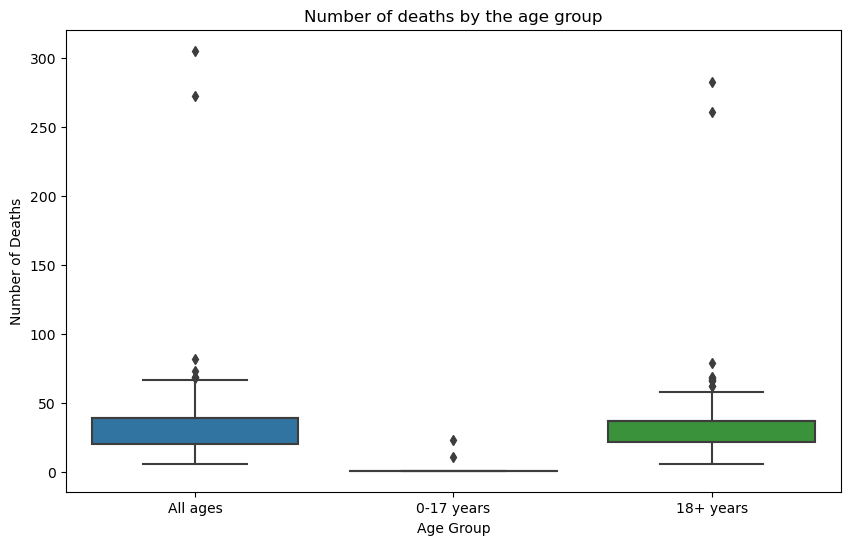

In [16]:
df_only_counties = df_deaths[df_deaths['COUNTY'] != 'California'] #We only want counties data

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE GROUP', y='NUMBER OF DEATHS', data=df_only_counties)
plt.title('Number of deaths by the age group')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.show()

Usually we can see that mostly the number of deaths lie from 0-80 with most of them being deaths of adults and some deaths in age group 0-17 years from 2014-2019. This can be misleading as well as we substituted most of the values in age group 0-17 age group

### Now, let's move to our next dataset - Emergency department data on Asthma patients from 2015-2020

In [16]:
import pandas as pd
df_ed = pd.read_csv('asthma-emergency-department-visit-rates-by-county-2015_2020.csv', encoding='latin1')
df_ed.head()

COUNTY  YEAR            STRATA STRATA NAME AGE GROUP  \
0  California  2015  Total population    All ages  All ages   
1     Alameda  2015  Total population    All ages  All ages   
2      Alpine  2015  Total population    All ages  All ages   
3      Amador  2015  Total population    All ages  All ages   
4       Butte  2015  Total population    All ages  All ages   

  NUMBER OF ED VISITS  AGE-ADJUSTED ED VISIT RATE COMMENT  
0             191,904                        50.4     NaN  
1               9,939                        64.3     NaN  
2                   0                         0.0     NaN  
3                 196                        58.4     NaN  
4               1,044                        50.2     NaN

In [17]:
# We dont want STRATA, STRATA NAME and COMMENT for analysis
df_ed.drop(columns = ['STRATA','STRATA NAME','COMMENT'],inplace=True)
df_ed

COUNTY  YEAR AGE GROUP NUMBER OF ED VISITS  \
0     California  2015  All ages             191,904   
1        Alameda  2015  All ages               9,939   
2         Alpine  2015  All ages                   0   
3         Amador  2015  All ages                 196   
4          Butte  2015  All ages               1,044   
...          ...   ...       ...                 ...   
4479      Tulare  2020  All ages                 NaN   
4480    Tuolumne  2020  All ages                   0   
4481     Ventura  2020  All ages                  14   
4482        Yolo  2020  All ages                  11   
4483        Yuba  2020  All ages                 NaN   

      AGE-ADJUSTED ED VISIT RATE  
0                           50.4  
1                           64.3  
2                            0.0  
3                           58.4  
4                           50.2  
...                          ...  
4479                         NaN  
4480                         0.0  
4481                         8.7  
4482                         NaN  
4483                         NaN  

[4484 rows x 5 columns]

In [18]:
df_ed.dtypes #We want Number of ED visits as integers

COUNTY                         object
YEAR                            int64
AGE GROUP                      object
NUMBER OF ED VISITS            object
AGE-ADJUSTED ED VISIT RATE    float64
dtype: object

In [19]:
df_ed.isna().sum() #We want to get rid of these missing values. Since its around 15% of the data and we want to avoid
# what happenend last time, this time we will drop it

COUNTY                          0
YEAR                            0
AGE GROUP                       0
NUMBER OF ED VISITS           681
AGE-ADJUSTED ED VISIT RATE    716
dtype: int64

In [20]:
df_ed.dropna(inplace = True)

In [21]:
df_ed.isna().sum() #The null values are removed. Now lets change the data types

COUNTY                        0
YEAR                          0
AGE GROUP                     0
NUMBER OF ED VISITS           0
AGE-ADJUSTED ED VISIT RATE    0
dtype: int64

In [22]:
df_ed['NUMBER OF ED VISITS'] = df_ed['NUMBER OF ED VISITS'].str.replace(',','').astype(int)

In [23]:
df_ed.dtypes

COUNTY                         object
YEAR                            int64
AGE GROUP                      object
NUMBER OF ED VISITS             int32
AGE-ADJUSTED ED VISIT RATE    float64
dtype: object

In [24]:
df_ed['AGE GROUP'].unique()

array(['All ages', '0\x9617 years', '18+ years', '0\x964 years',
       '5\x9617 years', '18\x9664 years', '65+ years'], dtype=object)

In [25]:
df_ed['AGE GROUP'] = df_ed['AGE GROUP'].str.replace('\x96','-')

In [26]:
df_ed['AGE GROUP'].unique()

array(['All ages', '0-17 years', '18+ years', '0-4 years', '5-17 years',
       '18-64 years', '65+ years'], dtype=object)

In [27]:
df_ed = df_ed[df_ed['NUMBER OF ED VISITS'] != 0]

In [28]:
df_ed.head()

COUNTY  YEAR AGE GROUP  NUMBER OF ED VISITS  AGE-ADJUSTED ED VISIT RATE
0  California  2015  All ages               191904                        50.4
1     Alameda  2015  All ages                 9939                        64.3
3      Amador  2015  All ages                  196                        58.4
4       Butte  2015  All ages                 1044                        50.2
5   Calaveras  2015  All ages                  185                        48.0

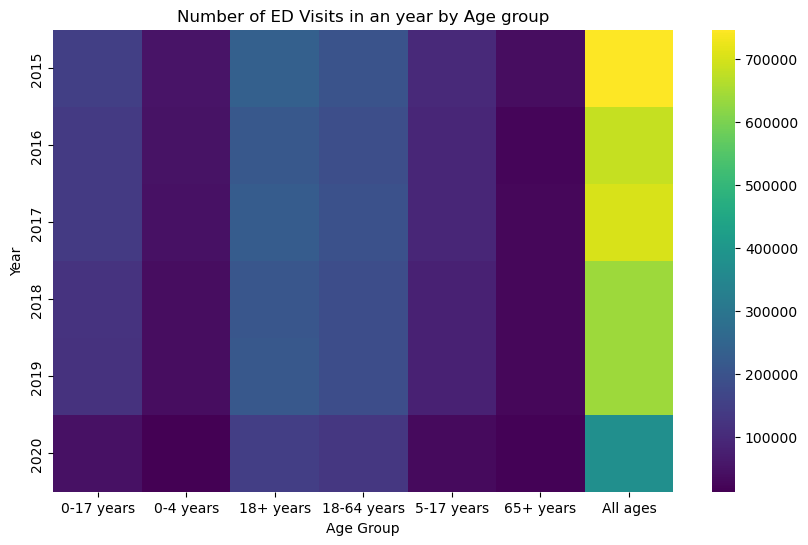

In [30]:
#The data is clean. Let's visualize now
#Lets see the number of ED visits for each age group from 2015 to 2020
pivot_table = df_ed.pivot_table(index='YEAR', columns='AGE GROUP', values='NUMBER OF ED VISITS', aggfunc=sum)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='viridis')
plt.title('Number of ED Visits in an year by Age group')
plt.xlabel('Age Group')
plt.ylabel('Year')
plt.show()

All ages is basically sum of the ages, so it is but obvious that it has highest ED visits. Now, apart from this we can see that 18+ and 18-64 years have highest ED visits as also proved from above. While, 0-4 years and 65+ age group people are almost similar visits and the least among the given age groups.

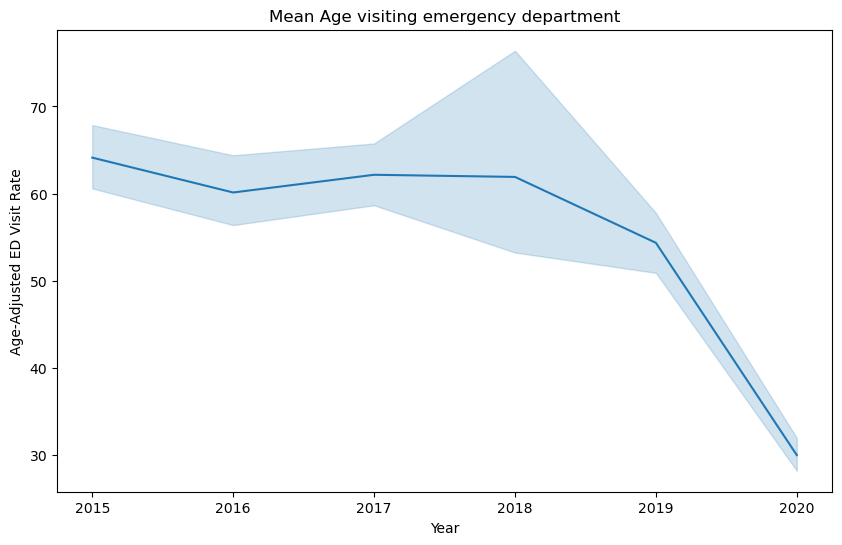

In [31]:
# Lets see the mean age of visiting an emergency department
plt.figure(figsize=(10, 6))
sns.lineplot(x='YEAR', y='AGE-ADJUSTED ED VISIT RATE', data=df_ed)
plt.title('Mean Age visiting emergency department')
plt.xlabel('Year')
plt.ylabel('Age-Adjusted ED Visit Rate')
plt.show()

We can see that the rate remained almost same and a little less when moving from 2018 to 2019. Afte that it sharply decreased. But here one more factor of COVID comes into play. There is a possiblity that even though people were having issues, they avoided going to hospitals.

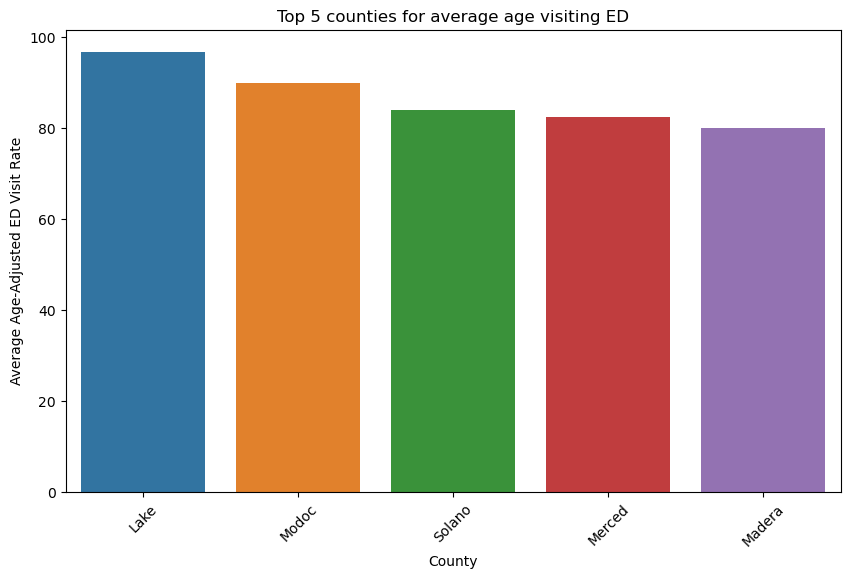

In [32]:
# For top 5 counties, I am counting the average age coming to ED

county_avg_rate = df_ed.groupby('COUNTY')['AGE-ADJUSTED ED VISIT RATE'].mean().reset_index()

top_counties = county_avg_rate.sort_values(by='AGE-ADJUSTED ED VISIT RATE', ascending=False)
top5 = top_counties.iloc[1:6]

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='COUNTY', y='AGE-ADJUSTED ED VISIT RATE', data=top5, order=top5['COUNTY'])
plt.title('Top 5 counties for average age visiting ED')
plt.xlabel('County')
plt.ylabel('Average Age-Adjusted ED Visit Rate')
plt.xticks(rotation=45)
plt.show()

These are the top 5 counties with their average age visiting EDs and most of them have their average age more than 65.

## Clustering

In [29]:
# Let's performing clustering over deaths of asthma dataset

df_deaths.head()

COUNTY      YEARS AGE GROUP  NUMBER OF DEATHS  \
0  California  2014-2016  All ages              1181   
1     Alameda  2014-2016  All ages                58   
2      Alpine  2014-2016  All ages                39   
3      Amador  2014-2016  All ages                39   
4       Butte  2014-2016  All ages                 7   

   AGE-ADJUSTED MORTALITY RATE  
0                         9.60  
1                        11.20  
2                         8.22  
3                         8.22  
4                         8.22

In [30]:
df_deaths[df_deaths['COUNTY'] != 'California']

COUNTY      YEARS  AGE GROUP  NUMBER OF DEATHS  \
1      Alameda  2014-2016   All ages                58   
2       Alpine  2014-2016   All ages                39   
3       Amador  2014-2016   All ages                39   
4        Butte  2014-2016   All ages                 7   
5    Calaveras  2014-2016   All ages                39   
..         ...        ...        ...               ...   
349     Tulare  2017-2019  18+ years                16   
350   Tuolumne  2017-2019  18+ years                37   
351    Ventura  2017-2019  18+ years                17   
352       Yolo  2017-2019  18+ years                37   
353       Yuba  2017-2019  18+ years                37   

     AGE-ADJUSTED MORTALITY RATE  
1                          11.20  
2                           8.22  
3                           8.22  
4                           8.22  
5                           8.22  
..                           ...  
349                        15.50  
350                        10.73  
351                         7.70  
352                        10.73  
353                        10.73  

[348 rows x 5 columns]

In [31]:
df_deaths.describe()

NUMBER OF DEATHS  AGE-ADJUSTED MORTALITY RATE
count        354.000000                   354.000000
mean          38.446328                     7.107486
std          124.128936                     5.693896
min            1.000000                     0.070000
25%            1.000000                     0.070000
50%           22.500000                     8.220000
75%           39.000000                    10.730000
max         1181.000000                    27.600000

In [32]:
df_deaths['YEARS'].unique()

array(['2014-2016', '2017-2019'], dtype=object)

In [33]:
df_deaths['AGE GROUP'].unique()

array(['All ages', '0-17 years', '18+ years'], dtype=object)

In [34]:
# Converting the years column and age group column into numerical from categorical

age_group_mapping = {'All ages': 0, '0-17 years': 1, '18+ years': 2}

# Apply mapping to the 'AGE GROUP' column
df_deaths['NUMERIC AGE GROUP'] = df_deaths['AGE GROUP'].map(age_group_mapping)

years_mapping = {'2014-2016': 0, '2017-2019': 1}

# Apply mapping to the 'YEARS' column
df_deaths['NUMERIC YEARS'] = df_deaths['YEARS'].map(years_mapping)

df_deaths.head()

COUNTY      YEARS AGE GROUP  NUMBER OF DEATHS  \
0  California  2014-2016  All ages              1181   
1     Alameda  2014-2016  All ages                58   
2      Alpine  2014-2016  All ages                39   
3      Amador  2014-2016  All ages                39   
4       Butte  2014-2016  All ages                 7   

   AGE-ADJUSTED MORTALITY RATE  NUMERIC AGE GROUP  NUMERIC YEARS  
0                         9.60                  0              0  
1                        11.20                  0              0  
2                         8.22                  0              0  
3                         8.22                  0              0  
4                         8.22                  0              0

In [35]:
# First row for each age group is summation of all deaths and overall age-adjusted mortality rate. We need to omit that
# as it would create baisness.

df_deaths1 = df_deaths[df_deaths['COUNTY'] != 'California']
df_deaths1.head()

COUNTY      YEARS AGE GROUP  NUMBER OF DEATHS  \
1    Alameda  2014-2016  All ages                58   
2     Alpine  2014-2016  All ages                39   
3     Amador  2014-2016  All ages                39   
4      Butte  2014-2016  All ages                 7   
5  Calaveras  2014-2016  All ages                39   

   AGE-ADJUSTED MORTALITY RATE  NUMERIC AGE GROUP  NUMERIC YEARS  
1                        11.20                  0              0  
2                         8.22                  0              0  
3                         8.22                  0              0  
4                         8.22                  0              0  
5                         8.22                  0              0

In [36]:
# before dealing with outliers
df_deaths1.describe()

NUMBER OF DEATHS  AGE-ADJUSTED MORTALITY RATE  NUMERIC AGE GROUP  \
count        348.000000                   348.000000         348.000000   
mean          25.609195                     7.100144           1.000000   
std           34.205636                     5.713607           0.817672   
min            1.000000                     0.070000           0.000000   
25%            1.000000                     0.070000           0.000000   
50%           20.500000                     8.220000           1.000000   
75%           39.000000                    10.730000           2.000000   
max          305.000000                    27.600000           2.000000   

       NUMERIC YEARS  
count      348.00000  
mean         0.50000  
std          0.50072  
min          0.00000  
25%          0.00000  
50%          0.50000  
75%          1.00000  
max          1.00000

### Now there are two forms of clustering that we might try on this - Hierarchical Clustering and K-Means Clustering. Also, we might wanna try testcases on either to include or to exclude the categorical values

## Hierarchical Clustering

#### Hierarchical Clustering with Categorical Variables(after converted to numerical ones)

In [24]:
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler

X = df_deaths1[['NUMBER OF DEATHS', 'AGE-ADJUSTED MORTALITY RATE', 'NUMERIC AGE GROUP', 'NUMERIC YEARS']]
#X = df_deaths1[['NUMBER OF DEATHS', 'AGE-ADJUSTED MORTALITY RATE']]

# Identify outliers using z-score
z_scores = np.abs(stats.zscore(X))
threshold = 3
outlier_indices = np.where(z_scores > threshold)

# Removing the outliers
X = X[(z_scores < threshold).all(axis=1)]
df_deaths1 = df_deaths1.drop(outlier_indices[0])

scaler = StandardScaler()   #using standard scaler to normalize it
X_scaled1 = scaler.fit_transform(X)
X_scaled1

NameError: name 'df_deaths1' is not defined

In [81]:
#after dealing with outliers, now describing the data
df_deaths1.describe()

NUMBER OF DEATHS  AGE-ADJUSTED MORTALITY RATE  NUMERIC AGE GROUP  \
count        341.000000                   341.000000         341.000000   
mean          25.498534                     7.033666           0.991202   
std           34.509557                     5.751655           0.813442   
min            1.000000                     0.070000           0.000000   
25%            1.000000                     0.070000           0.000000   
50%           20.000000                     8.220000           1.000000   
75%           39.000000                    10.730000           2.000000   
max          305.000000                    27.600000           2.000000   

       NUMERIC YEARS  
count     341.000000  
mean        0.498534  
std         0.500733  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


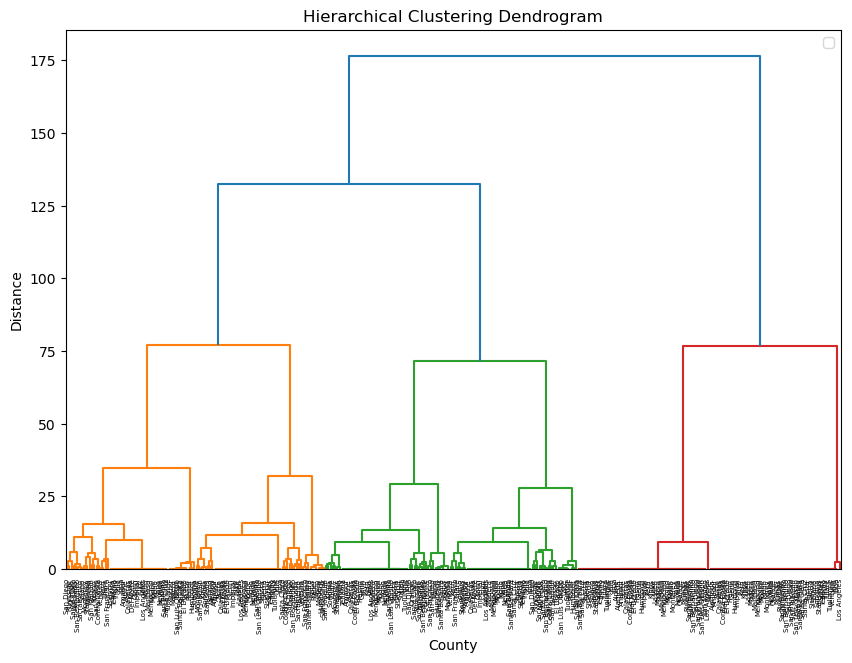

In [82]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(X_scaled1)

# Perform hierarchical clustering using cosine similarity
linked = linkage(cosine_sim, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=df_deaths1['COUNTY'].tolist(),
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('County')
plt.ylabel('Distance')
plt.legend()
plt.show()

As seen by including the catergorical values, the optimal number of clusters from this diagram comes out around 3(horizontal line around 120)

#### Hierarchical Clustering without Categorical Variables(after converted to numerical ones)

In [83]:
from sklearn.preprocessing import StandardScaler

#X = df_deaths[['NUMBER OF DEATHS', 'AGE-ADJUSTED MORTALITY RATE', 'NUMERIC AGE GROUP', 'NUMERIC YEARS']]
X = df_deaths1[['NUMBER OF DEATHS', 'AGE-ADJUSTED MORTALITY RATE']]

scaler = StandardScaler()   #using standard scaler to normalize it
X_scaled2 = scaler.fit_transform(X)
X_scaled2

array([[ 0.94319458,  0.72543591],
       [ 0.39181339,  0.20656276],
       [ 0.39181339,  0.20656276],
       [-0.5368286 ,  0.20656276],
       [ 0.39181339,  0.20656276],
       [ 0.39181339,  0.20656276],
       [ 0.42083346,  0.62096481],
       [ 0.39181339,  0.20656276],
       [-0.5368286 ,  0.20656276],
       [ 0.39181339,  1.30002698],
       [ 0.39181339,  0.20656276],
       [-0.44976841,  0.20656276],
       [ 0.39181339,  0.20656276],
       [ 0.39181339,  0.20656276],
       [-0.10152767,  0.39461075],
       [-0.56584866,  0.20656276],
       [ 0.39181339,  0.20656276],
       [ 8.11114997,  0.48167   ],
       [-0.56584866,  0.20656276],
       [ 0.39181339,  0.20656276],
       [ 0.39181339,  0.20656276],
       [ 0.39181339,  0.20656276],
       [-0.27564804,  2.53626839],
       [ 0.39181339,  0.20656276],
       [ 0.39181339,  0.20656276],
       [-0.18858785,  1.24779143],
       [ 0.39181339,  0.20656276],
       [ 0.39181339,  0.20656276],
       [ 0.85613439,

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


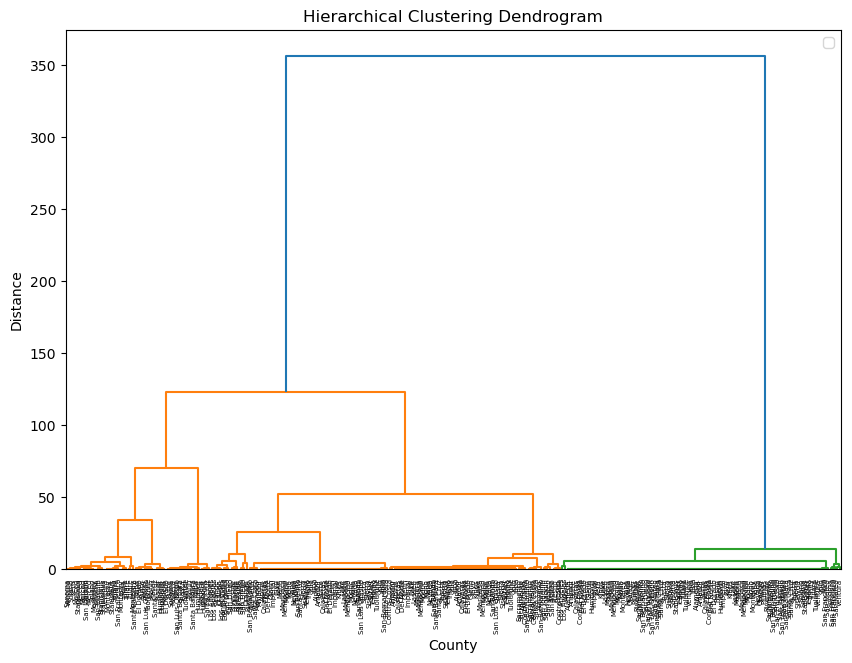

In [84]:
cosine_sim = cosine_similarity(X_scaled2)

# Perform hierarchical clustering using cosine similarity
linked = linkage(cosine_sim, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=df_deaths1['COUNTY'].tolist(),
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('County')
plt.ylabel('Distance')
plt.legend()
plt.show()

As seen by not including the catergorical values, the optimal number of clusters from this diagram comes out around 2(horizontal line aound 170)

## K-Means Clustering

#### KMeans Clustering with Categorical Variables(after converted to numerical ones)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

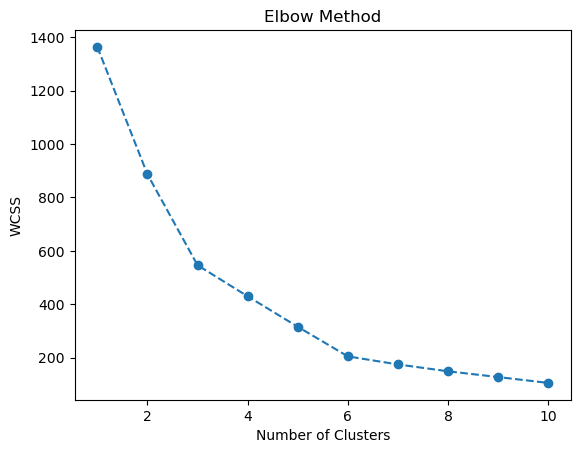

In [85]:
from sklearn.cluster import KMeans
wcss = []

# experimenting for 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled1)
    wcss.append(kmeans.inertia_)

# plotting the curve that is basically elbow method
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Clusters coming out to be 6 or 7 from elbow method

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

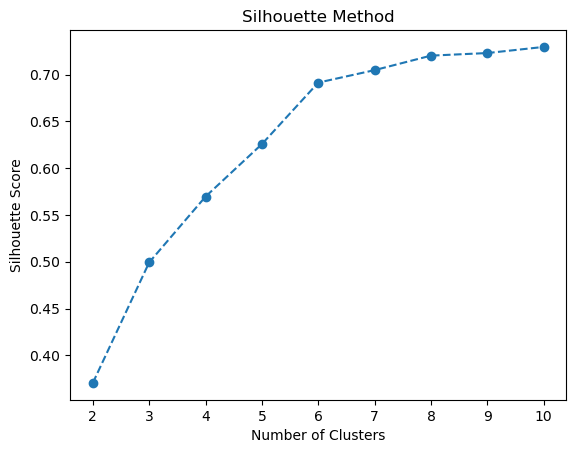

In [86]:
from sklearn.metrics import silhouette_score
s_scores = []

# Plotting with different values of cluster
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled1)
    labels = kmeans.labels_
    s_avg = silhouette_score(X_scaled1, labels)
    s_scores.append(s_avg)

# plotting the silhouette graph
plt.plot(range(2, 11), s_scores, marker='o', linestyle='--')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Here the silhoutte method is suggesting around 8.

Lets try with 6,7,8 to check our results

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


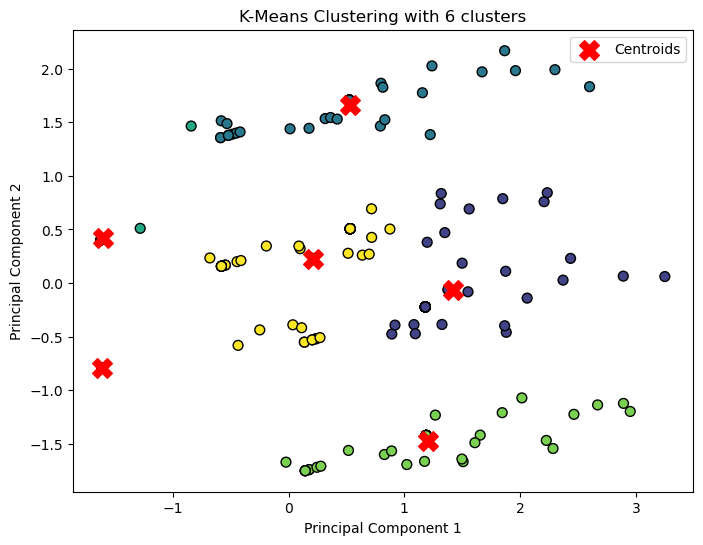

In [87]:
from sklearn.decomposition import PCA
# performing kmeans clustering with 6 clusters

# We would need to transform this to 2 components from current 4 components
pca = PCA(n_components=2)  # Reducing to 2 dimension
X_pca = pca.fit_transform(X_scaled1)

kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit(X_pca)

cluster_labels = kmeans.labels_

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = [['Principal Component 1','Principal Component 2']])

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)

# Plotting the centroids as well
plt.scatter(centroids.values[:, 0], centroids.values[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering with 6 clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [88]:
X_scaled1_df = pd.DataFrame(X_scaled1, columns=['NUMBER OF DEATHS','AGE-ADJUSTED MORTALITY RATE','NUMERIC AGE GROUP','NUMERIC YEARS'])
X_scaled1_df['CLUSTER'] = kmeans.labels_
X_scaled1_df.head()

NUMBER OF DEATHS  AGE-ADJUSTED MORTALITY RATE  NUMERIC AGE GROUP  \
0          1.735775                     0.790945           -1.22032   
1          0.804191                     0.243791           -1.22032   
2          0.804191                     0.243791           -1.22032   
3         -0.764794                     0.243791           -1.22032   
4          0.804191                     0.243791           -1.22032   

   NUMERIC YEARS  CLUSTER  
0      -0.997072        1  
1      -0.997072        5  
2      -0.997072        5  
3      -0.997072        5  
4      -0.997072        5

In [89]:
X_scaled1_df['PCA1'] = X_pca[:, 0]
X_scaled1_df['PCA2'] = X_pca[:, 1]
X_scaled1_df.head()

NUMBER OF DEATHS  AGE-ADJUSTED MORTALITY RATE  NUMERIC AGE GROUP  \
0          1.735775                     0.790945           -1.22032   
1          0.804191                     0.243791           -1.22032   
2          0.804191                     0.243791           -1.22032   
3         -0.764794                     0.243791           -1.22032   
4          0.804191                     0.243791           -1.22032   

   NUMERIC YEARS  CLUSTER      PCA1      PCA2  
0      -0.997072        1  1.559661  0.691124  
1      -0.997072        5  0.532070  0.506824  
2      -0.997072        5  0.532070  0.506824  
3      -0.997072        5 -0.545450  0.167260  
4      -0.997072        5  0.532070  0.506824

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


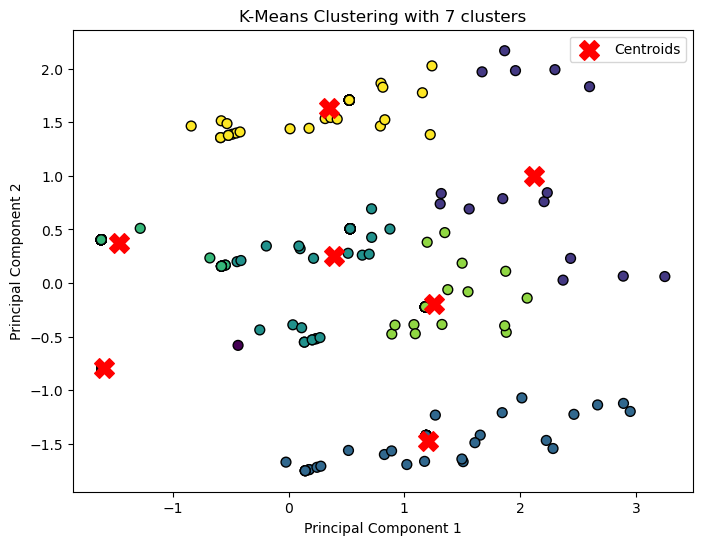

In [90]:
# performing kmeans clustering with 7 clusters

# We would need to transform this to 2 components from current 4 components
pca = PCA(n_components=2)  # Reducing to 2 dimension
X_pca = pca.fit_transform(X_scaled1)

kmeans = KMeans(n_clusters=7, init='k-means++', random_state=42)
kmeans.fit(X_pca)

cluster_labels = kmeans.labels_

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = [['Principal Component 1','Principal Component 2']])

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)

# Plotting the centroids as well
plt.scatter(centroids.values[:, 0], centroids.values[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering with 7 clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


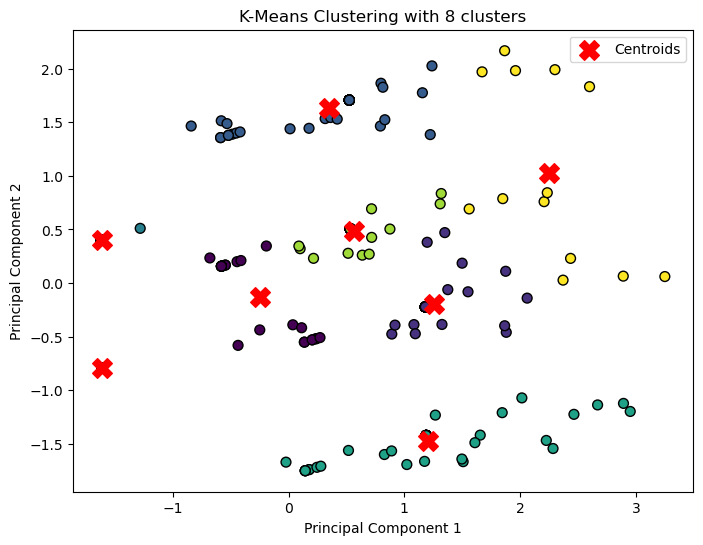

In [91]:
# performing kmeans clustering with 8 clusters

# We would need to transform this to 2 components from current 4 components
pca = PCA(n_components=2)  # Reducing to 2 dimension
X_pca = pca.fit_transform(X_scaled1)

kmeans = KMeans(n_clusters=8, init='k-means++', random_state=42)
kmeans.fit(X_pca)

cluster_labels = kmeans.labels_

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = [['Principal Component 1','Principal Component 2']])

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)

# Plotting the centroids as well
plt.scatter(centroids.values[:, 0], centroids.values[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering with 8 clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

#### KMeans Clustering without Categorical Variables(after converted to numerical ones)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

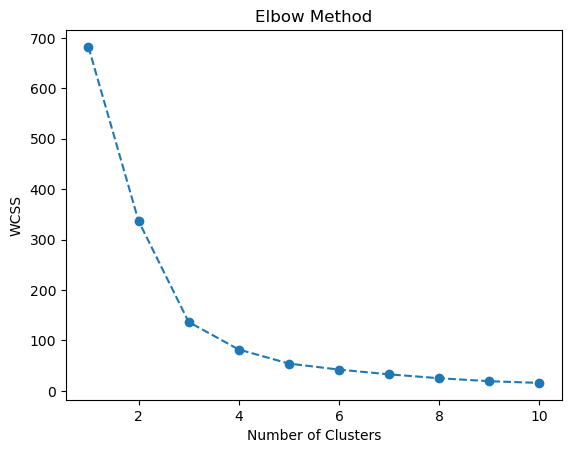

In [92]:
from sklearn.cluster import KMeans
wcss = []

# experimenting for 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled2)
    wcss.append(kmeans.inertia_)

# plotting the curve that is basically elbow method
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Number of clusters seems to be near 4 or 5

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

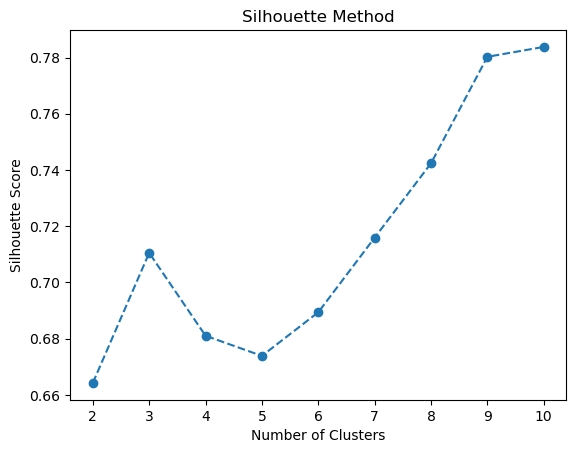

In [93]:
from sklearn.metrics import silhouette_score
s_scores = []

# Plotting with different values of cluster
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled2)
    labels = kmeans.labels_
    s_avg = silhouette_score(X_scaled2, labels)
    s_scores.append(s_avg)

# plotting the silhouette graph
plt.plot(range(2, 11), s_scores, marker='o', linestyle='--')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Silhouette score doesn't seem to be a good method here and so going with elbow method and trying for clusters 4,5,6

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


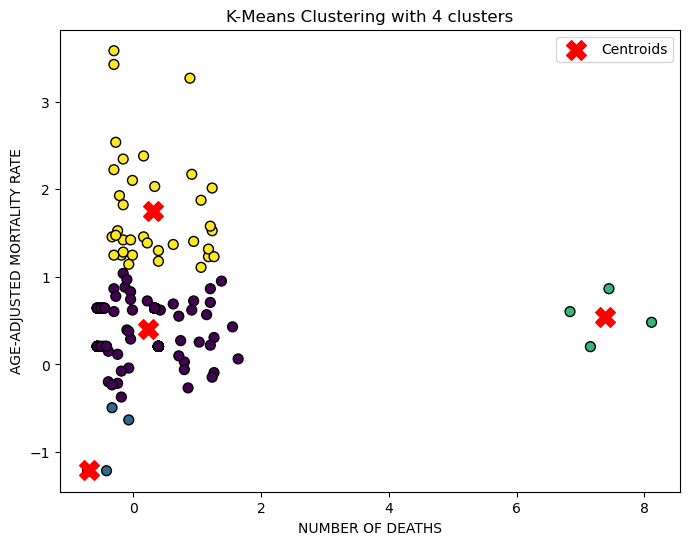

In [94]:
# performing kmeans clustering with 4 clusters

# Here PCA is not required as there are only 2 numeric variables

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X_scaled2)

cluster_labels = kmeans.labels_

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = [['NUMBER OF DEATHS','AGE-ADJUSTED MORTALITY RATE']])

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled2[:,0], X_scaled2[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)

# Plotting the centroids as well
plt.scatter(centroids.values[:, 0], centroids.values[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering with 4 clusters')
plt.xlabel('NUMBER OF DEATHS')
plt.ylabel('AGE-ADJUSTED MORTALITY RATE')
plt.legend()
plt.show()

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


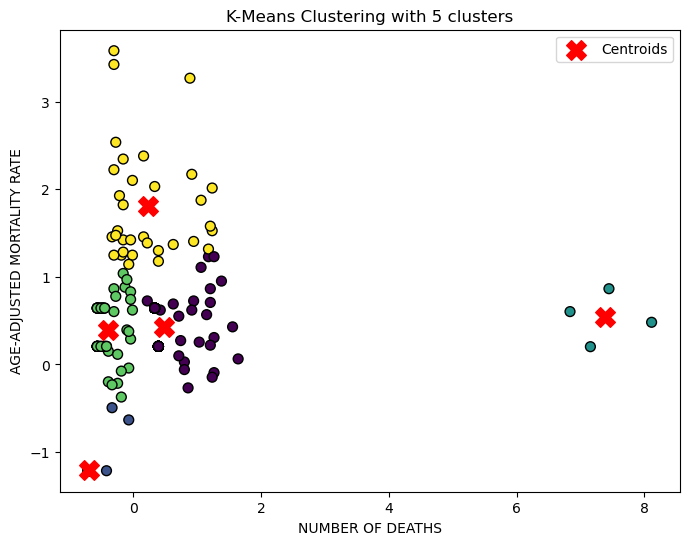

In [95]:
# performing kmeans clustering with 5 clusters

# Here PCA is not required as there are only 2 numeric variables

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X_scaled2)

cluster_labels = kmeans.labels_

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = [['NUMBER OF DEATHS','AGE-ADJUSTED MORTALITY RATE']])

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled2[:,0], X_scaled2[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)

# Plotting the centroids as well
plt.scatter(centroids.values[:, 0], centroids.values[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering with 5 clusters')
plt.xlabel('NUMBER OF DEATHS')
plt.ylabel('AGE-ADJUSTED MORTALITY RATE')
plt.legend()
plt.show()

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


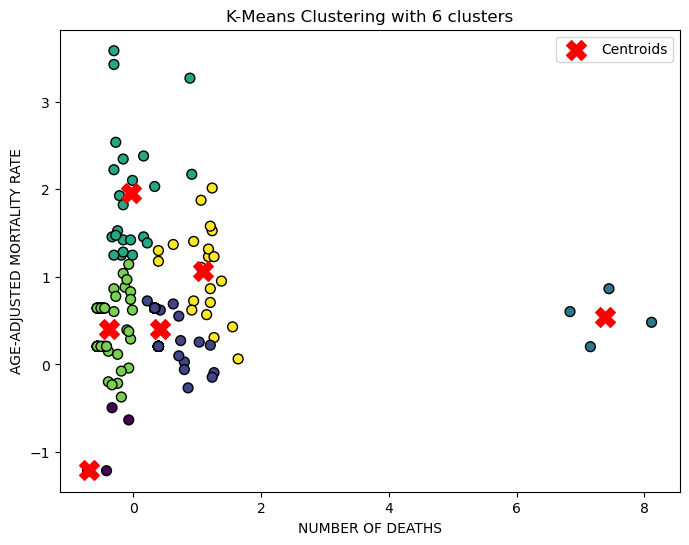

In [96]:
# performing kmeans clustering with 6 clusters

# Here PCA is not required as there are only 2 numeric variables

kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit(X_scaled2)

cluster_labels = kmeans.labels_

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = [['NUMBER OF DEATHS','AGE-ADJUSTED MORTALITY RATE']])

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled2[:,0], X_scaled2[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)

# Plotting the centroids as well
plt.scatter(centroids.values[:, 0], centroids.values[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering with 6 clusters')
plt.xlabel('NUMBER OF DEATHS')
plt.ylabel('AGE-ADJUSTED MORTALITY RATE')
plt.legend()
plt.show()

## Now lets move to next dataset, df_ed

In [37]:
df_ed.head()

COUNTY  YEAR AGE GROUP  NUMBER OF ED VISITS  AGE-ADJUSTED ED VISIT RATE
0  California  2015  All ages               191904                        50.4
1     Alameda  2015  All ages                 9939                        64.3
3      Amador  2015  All ages                  196                        58.4
4       Butte  2015  All ages                 1044                        50.2
5   Calaveras  2015  All ages                  185                        48.0

In [38]:
df_ed.describe()

YEAR  NUMBER OF ED VISITS  AGE-ADJUSTED ED VISIT RATE
count  3489.000000          3489.000000                 3489.000000
mean   2017.505589          2194.580396                   55.513414
std       1.704532         10483.701598                   74.511910
min    2015.000000            12.000000                    5.000000
25%    2016.000000            62.000000                   28.100000
50%    2018.000000           259.000000                   42.900000
75%    2019.000000           993.000000                   64.500000
max    2020.000000        191904.000000                 3531.000000

### Lets create 2 more columns with categorical values(AGE GROUP and YEAR) being transformed to numerical values.
### Remove the california row as it would create biasness and then do the same thing as above

In [39]:
df_ed['YEAR'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [40]:
df_ed['AGE GROUP'].unique()

array(['All ages', '0-17 years', '18+ years', '0-4 years', '5-17 years',
       '18-64 years', '65+ years'], dtype=object)

In [41]:
year_mapping = {2015: 0, 2016: 1, 2017: 2, 2018: 3, 2019: 4, 2020: 5}

# Apply mapping to the 'YEARS' column
df_ed['NUMERIC YEAR'] = df_ed['YEAR'].map(year_mapping)

age_group_mapping = {'All ages': 0, '0-17 years': 1, '18+ years': 2, '0-4 years': 3, '5-17 years': 4,
       '18-64 years': 5, '65+ years': 6}

# Apply mapping to the 'AGE GROUP' column
df_ed['NUMERIC AGE GROUP'] = df_ed['AGE GROUP'].map(age_group_mapping)

df_ed.head()

C:\Users\kalpm\AppData\Local\Temp\ipykernel_11116\694938273.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ed['NUMERIC YEAR'] = df_ed['YEAR'].map(year_mapping)
C:\Users\kalpm\AppData\Local\Temp\ipykernel_11116\694938273.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ed['NUMERIC AGE GROUP'] = df_ed['AGE GROUP'].map(age_group_mapping)


COUNTY  YEAR AGE GROUP  NUMBER OF ED VISITS  \
0  California  2015  All ages               191904   
1     Alameda  2015  All ages                 9939   
3      Amador  2015  All ages                  196   
4       Butte  2015  All ages                 1044   
5   Calaveras  2015  All ages                  185   

   AGE-ADJUSTED ED VISIT RATE  NUMERIC YEAR  NUMERIC AGE GROUP  
0                        50.4             0                  0  
1                        64.3             0                  0  
3                        58.4             0                  0  
4                        50.2             0                  0  
5                        48.0             0                  0

In [42]:
df_ed1 = df_ed[df_ed['COUNTY'] != 'California']
df_ed1.head()

COUNTY  YEAR AGE GROUP  NUMBER OF ED VISITS  AGE-ADJUSTED ED VISIT RATE  \
1    Alameda  2015  All ages                 9939                        64.3   
3     Amador  2015  All ages                  196                        58.4   
4      Butte  2015  All ages                 1044                        50.2   
5  Calaveras  2015  All ages                  185                        48.0   
6     Colusa  2015  All ages                   97                        41.4   

   NUMERIC YEAR  NUMERIC AGE GROUP  
1             0                  0  
3             0                  0  
4             0                  0  
5             0                  0  
6             0                  0

In [43]:
df_ed1.describe()

YEAR  NUMBER OF ED VISITS  AGE-ADJUSTED ED VISIT RATE  \
count  3413.000000          3413.000000                 3413.000000   
mean   2017.503369          1117.126282                   55.603076   
std       1.704006          3170.231469                   75.130637   
min    2015.000000            12.000000                    5.000000   
25%    2016.000000            61.000000                   28.100000   
50%    2018.000000           233.000000                   43.000000   
75%    2019.000000           907.000000                   64.500000   
max    2020.000000         52227.000000                 3531.000000   

       NUMERIC YEAR  NUMERIC AGE GROUP  
count   3413.000000        3413.000000  
mean       2.503369           1.886610  
std        1.704006           2.132284  
min        0.000000           0.000000  
25%        1.000000           0.000000  
50%        3.000000           1.000000  
75%        4.000000           4.000000  
max        5.000000           6.000000

### Now doing Hierarchical and K-Means clustering with and without categorical values

#### Hierarchical clustering with categorical values

In [44]:
df_ed1.describe()

YEAR  NUMBER OF ED VISITS  AGE-ADJUSTED ED VISIT RATE  \
count  3413.000000          3413.000000                 3413.000000   
mean   2017.503369          1117.126282                   55.603076   
std       1.704006          3170.231469                   75.130637   
min    2015.000000            12.000000                    5.000000   
25%    2016.000000            61.000000                   28.100000   
50%    2018.000000           233.000000                   43.000000   
75%    2019.000000           907.000000                   64.500000   
max    2020.000000         52227.000000                 3531.000000   

       NUMERIC YEAR  NUMERIC AGE GROUP  
count   3413.000000        3413.000000  
mean       2.503369           1.886610  
std        1.704006           2.132284  
min        0.000000           0.000000  
25%        1.000000           0.000000  
50%        3.000000           1.000000  
75%        4.000000           4.000000  
max        5.000000           6.000000

In [45]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats

X = df_ed1[['NUMBER OF ED VISITS', 'AGE-ADJUSTED ED VISIT RATE', 'NUMERIC AGE GROUP', 'NUMERIC YEAR']]

# Identify outliers using z-score
z_scores1 = np.abs(stats.zscore(X))
threshold1 = 3
outlier_indices1 = np.where(z_scores1 > threshold1)[0]  # Get the indices directly

# Removing the outliers from X
X = X[(z_scores1 < threshold1).all(axis=1)]

# Removing corresponding rows from df_ed1
df_ed1 = df_ed1.drop(df_ed1.index[outlier_indices1])

scaler = StandardScaler()   # using standard scaler to normalize it
X_scaled3 = scaler.fit_transform(X)
X_scaled3

array([[ 6.15411818,  0.30503323, -0.89080194, -1.47227285],
       [-0.43339899,  0.15140909, -0.89080194, -1.47227285],
       [ 0.13995773, -0.06210243, -0.89080194, -1.47227285],
       ...,
       [-0.54496015, -1.23901959, -0.89080194,  1.45949179],
       [-0.53481822, -0.90833711, -0.89080194,  1.45949179],
       [-0.55645433, -1.14267903, -0.89080194,  1.45949179]])

In [21]:
df_ed_normalized = pd.DataFrame(X_scaled3,columns=['NUMBER OF ED VISITS', 'AGE-ADJUSTED ED VISIT RATE', 'NUMERIC AGE GROUP', 'NUMERIC YEAR'])
df_ed_normalized.head()

NUMBER OF ED VISITS  AGE-ADJUSTED ED VISIT RATE  NUMERIC AGE GROUP  \
0             6.154118                    0.305033          -0.890802   
1            -0.433399                    0.151409          -0.890802   
2             0.139958                   -0.062102          -0.890802   
3            -0.440836                   -0.119386          -0.890802   
4            -0.500336                   -0.291237          -0.890802   

   NUMERIC YEAR  
0     -1.472273  
1     -1.472273  
2     -1.472273  
3     -1.472273  
4     -1.472273

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

cosine_sim = cosine_similarity(X_scaled3)

# Perform hierarchical clustering using cosine similarity
linked = linkage(cosine_sim, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=df_ed1['COUNTY'].tolist(),
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('County')
plt.ylabel('Distance')
plt.legend()
plt.show()

As per the diagram the number of clusters come out to be around 4(horizontal line around 750)

#### Now without the categorical values

In [ ]:
X = df_ed1[['NUMBER OF ED VISITS', 'AGE-ADJUSTED ED VISIT RATE']]

scaler = StandardScaler()   #using standard scaler to normalize it
X_scaled4 = scaler.fit_transform(X)
X_scaled4

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

cosine_sim = cosine_similarity(X_scaled4)

# Perform hierarchical clustering using cosine similarity
linked = linkage(cosine_sim, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=df_ed1['COUNTY'].tolist(),
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('County')
plt.ylabel('Distance')
plt.legend()
plt.show()

As seen from the figure the number of clusters should be around 2(horizontal line around 1500)

#### K Means with categorical variables

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

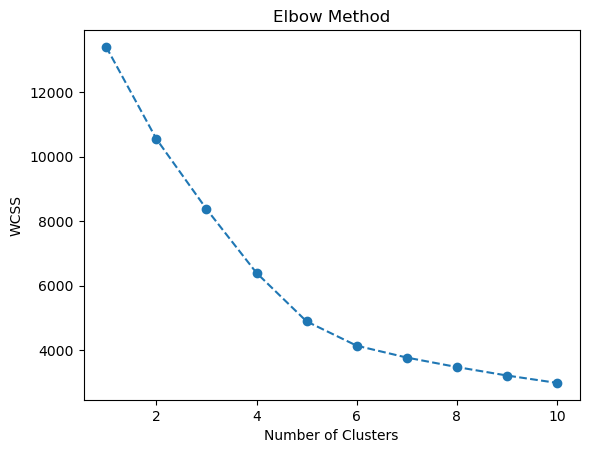

In [109]:
from sklearn.cluster import KMeans
wcss = []

# experimenting for 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled3)
    wcss.append(kmeans.inertia_)

# plotting the curve that is basically elbow method
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From elbow method the number of clusters seems around 6

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

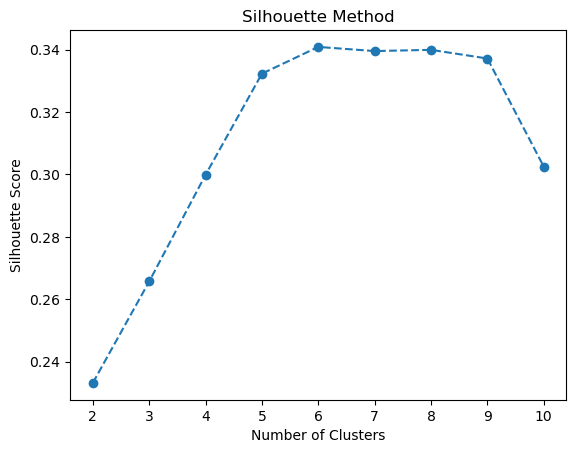

In [110]:
from sklearn.metrics import silhouette_score
s_scores = []

# Plotting with different values of cluster
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled3)
    labels = kmeans.labels_
    s_avg = silhouette_score(X_scaled3, labels)
    s_scores.append(s_avg)

# plotting the silhouette graph
plt.plot(range(2, 11), s_scores, marker='o', linestyle='--')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

From the silhouette method, the number of clusters seems to be 6. Therefore lets try 5,6 and 7

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


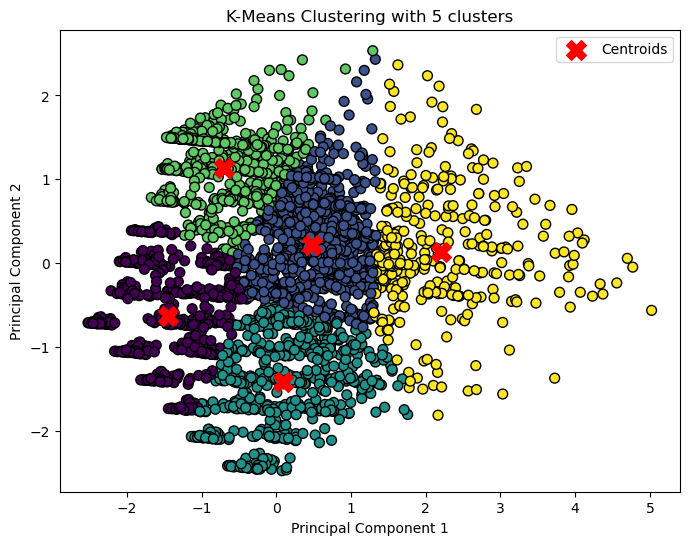

In [111]:
# performing kmeans clustering with 5 clusters

# We would need to transform this to 2 components from current 4 components
pca = PCA(n_components=2)  # Reducing to 2 dimension
X_pca = pca.fit_transform(X_scaled3)

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X_pca)

cluster_labels = kmeans.labels_

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = [['Principal Component 1','Principal Component 2']])

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)

# Plotting the centroids as well
plt.scatter(centroids.values[:, 0], centroids.values[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering with 5 clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


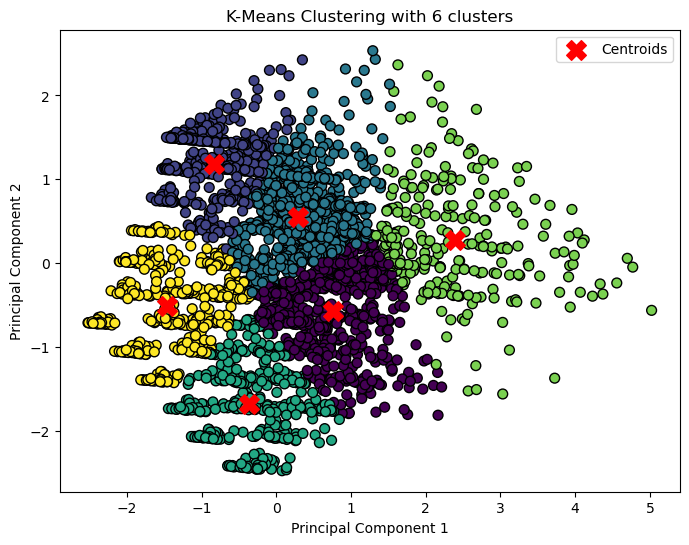

In [112]:
# performing kmeans clustering with 6 clusters

# We would need to transform this to 2 components from current 4 components
pca = PCA(n_components=2)  # Reducing to 2 dimension
X_pca = pca.fit_transform(X_scaled3)

kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit(X_pca)

cluster_labels = kmeans.labels_

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = [['Principal Component 1','Principal Component 2']])

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)

# Plotting the centroids as well
plt.scatter(centroids.values[:, 0], centroids.values[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering with 6 clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [113]:
X_scaled3_df = pd.DataFrame(X_scaled3, columns = [['NUMBER OF ED VISITS', 'AGE-ADJUSTED ED VISIT RATE', 'NUMERIC YEAR', 'NUMERIC AGE GROUP']])
X_scaled3_df['CLUSTER'] = kmeans.labels_
X_scaled3_df.head()

NUMBER OF ED VISITS AGE-ADJUSTED ED VISIT RATE NUMERIC YEAR  \
0            6.154118                   0.305033    -0.890802   
1           -0.433399                   0.151409    -0.890802   
2            0.139958                  -0.062102    -0.890802   
3           -0.440836                  -0.119386    -0.890802   
4           -0.500336                  -0.291237    -0.890802   

  NUMERIC AGE GROUP CLUSTER  
0         -1.472273       4  
1         -1.472273       0  
2         -1.472273       0  
3         -1.472273       0  
4         -1.472273       0

In [114]:
X_scaled3_df['PCA1'] = X_pca[:, 0]
X_scaled3_df['PCA2'] = X_pca[:, 1]
X_scaled3_df.head()

NUMBER OF ED VISITS AGE-ADJUSTED ED VISIT RATE NUMERIC YEAR  \
0            6.154118                   0.305033    -0.890802   
1           -0.433399                   0.151409    -0.890802   
2            0.139958                  -0.062102    -0.890802   
3           -0.440836                  -0.119386    -0.890802   
4           -0.500336                  -0.291237    -0.890802   

  NUMERIC AGE GROUP CLUSTER      PCA1      PCA2  
0         -1.472273       4  3.229647  1.136367  
1         -1.472273       0  1.147124 -0.250709  
2         -1.472273       0  1.177793 -0.116649  
3         -1.472273       0  0.965155 -0.236372  
4         -1.472273       0  0.833204 -0.238882

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


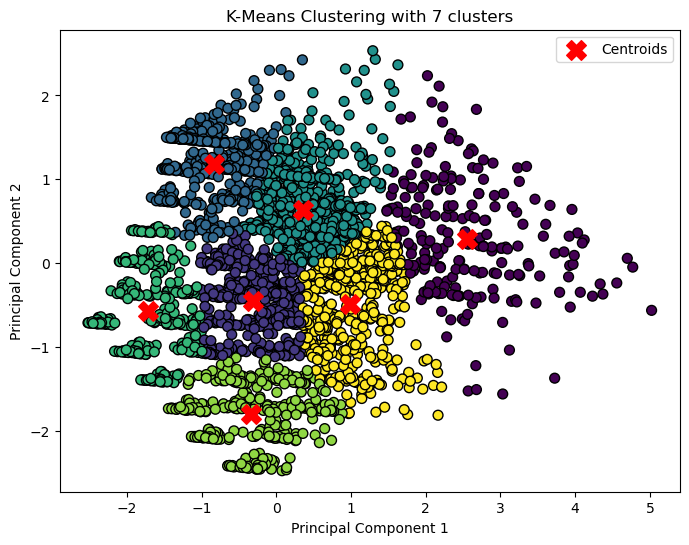

In [115]:
# performing kmeans clustering with 7 clusters

# We would need to transform this to 2 components from current 4 components
pca = PCA(n_components=2)  # Reducing to 2 dimension
X_pca = pca.fit_transform(X_scaled3)

kmeans = KMeans(n_clusters=7, init='k-means++', random_state=42)
kmeans.fit(X_pca)

cluster_labels = kmeans.labels_

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = [['Principal Component 1','Principal Component 2']])

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)

# Plotting the centroids as well
plt.scatter(centroids.values[:, 0], centroids.values[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering with 7 clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

### K Means without categorical

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

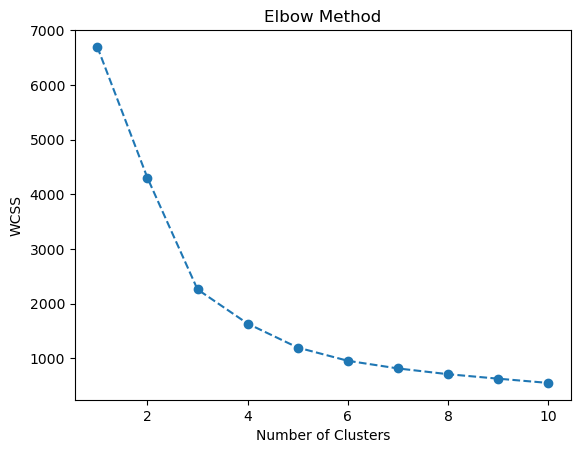

In [116]:
from sklearn.cluster import KMeans
wcss = []

# experimenting for 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled4)
    wcss.append(kmeans.inertia_)

# plotting the curve that is basically elbow method
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Clusters seems to be around 5 or 6 as per elbow method

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

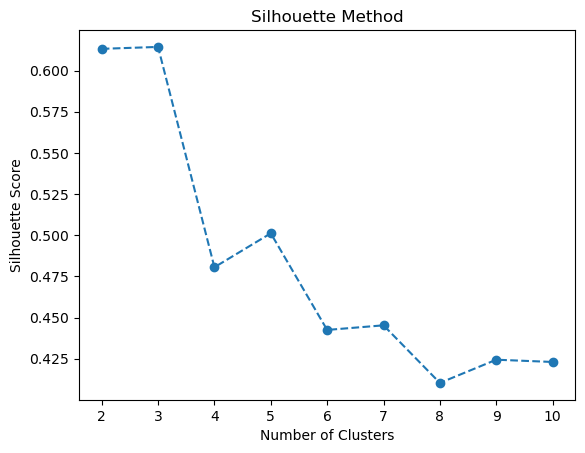

In [117]:
from sklearn.metrics import silhouette_score
s_scores = []

# Plotting with different values of cluster
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled4)
    labels = kmeans.labels_
    s_avg = silhouette_score(X_scaled4, labels)
    s_scores.append(s_avg)

# plotting the silhouette graph
plt.plot(range(2, 11), s_scores, marker='o', linestyle='--')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Silhouette doesn't seem to answer properly, so trying with 5,6,7 clusters

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


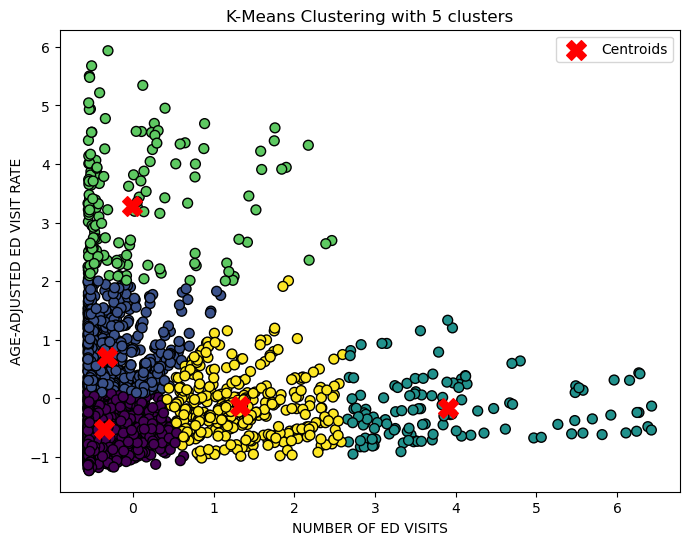

In [118]:
# performing kmeans clustering with 5 clusters

# We don't need PCA here as only 2 features

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X_scaled4)

cluster_labels = kmeans.labels_

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = [['NUMBER OF ED VISITS','AGE-ADJUSTED ED VISIT RATE']])

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled4[:, 0], X_scaled4[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)

# Plotting the centroids as well
plt.scatter(centroids.values[:, 0], centroids.values[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering with 5 clusters')
plt.xlabel('NUMBER OF ED VISITS')
plt.ylabel('AGE-ADJUSTED ED VISIT RATE')
plt.legend()
plt.show()

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


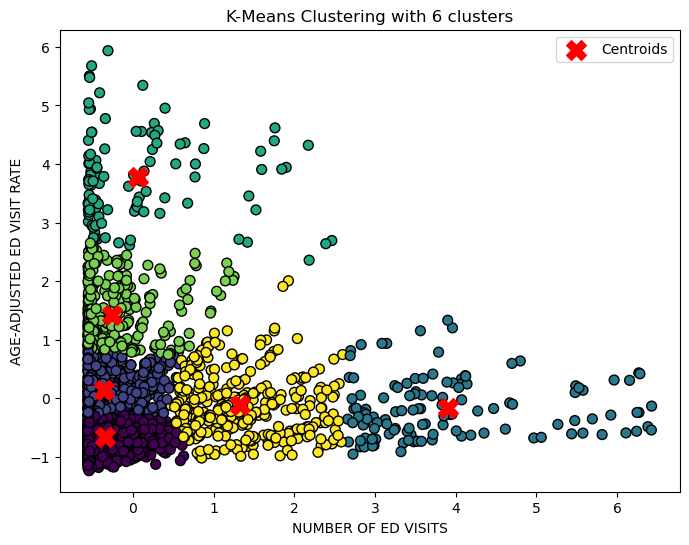

In [119]:
# performing kmeans clustering with 6 clusters

# We don't need PCA here as only 2 features

kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit(X_scaled4)

cluster_labels = kmeans.labels_

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = [['NUMBER OF ED VISITS','AGE-ADJUSTED ED VISIT RATE']])

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled4[:, 0], X_scaled4[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)

# Plotting the centroids as well
plt.scatter(centroids.values[:, 0], centroids.values[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering with 6 clusters')
plt.xlabel('NUMBER OF ED VISITS')
plt.ylabel('AGE-ADJUSTED ED VISIT RATE')
plt.legend()
plt.show()

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


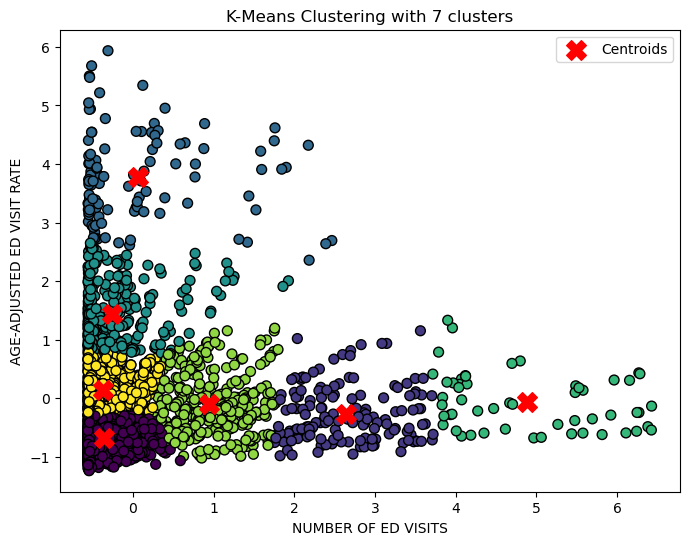

In [120]:
# performing kmeans clustering with 7 clusters

# We don't need PCA here as only 2 features

kmeans = KMeans(n_clusters=7, init='k-means++', random_state=42)
kmeans.fit(X_scaled4)

cluster_labels = kmeans.labels_

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = [['NUMBER OF ED VISITS','AGE-ADJUSTED ED VISIT RATE']])

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled4[:, 0], X_scaled4[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)

# Plotting the centroids as well
plt.scatter(centroids.values[:, 0], centroids.values[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering with 7 clusters')
plt.xlabel('NUMBER OF ED VISITS')
plt.ylabel('AGE-ADJUSTED ED VISIT RATE')
plt.legend()
plt.show()

## Naive Bayes Algorithm

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### df_deaths dataset

In [50]:
df_deaths1.head()

COUNTY      YEARS AGE GROUP  NUMBER OF DEATHS  \
1    Alameda  2014-2016  All ages                58   
2     Alpine  2014-2016  All ages                39   
3     Amador  2014-2016  All ages                39   
4      Butte  2014-2016  All ages                 7   
5  Calaveras  2014-2016  All ages                39   

   AGE-ADJUSTED MORTALITY RATE  NUMERIC AGE GROUP  NUMERIC YEARS  
1                        11.20                  0              0  
2                         8.22                  0              0  
3                         8.22                  0              0  
4                         8.22                  0              0  
5                         8.22                  0              0

##### We will try to predict the numeric age group labels(0: All Ages,1: 0-17 ,2: 18+)

In [51]:
X1 = df_deaths1[['NUMBER OF DEATHS', 'AGE-ADJUSTED MORTALITY RATE', 'NUMERIC YEARS']] #variables
y1 = df_deaths1[['NUMERIC AGE GROUP']] #target

In [52]:
# Splitting the datasets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X1, y1,test_size=0.2) #80-20 split

In [53]:
X_train.head()

NUMBER OF DEATHS  AGE-ADJUSTED MORTALITY RATE  NUMERIC YEARS
181                39                         8.22              1
80                  1                         0.07              0
92                  1                         0.07              0
17                 39                         8.22              0
68                  1                         0.07              0

In [55]:
y_train.head()

NUMERIC AGE GROUP
181                  0
80                   1
92                   1
17                   0
68                   1

In [56]:
X_test.head()

NUMBER OF DEATHS  AGE-ADJUSTED MORTALITY RATE  NUMERIC YEARS
260                 1                         0.07              1
116                 1                         0.07              0
320                37                        10.73              1
273                 1                         0.07              1
170                37                        10.73              0

In [57]:
y_test.head()

NUMERIC AGE GROUP
260                  1
116                  1
320                  2
273                  1
170                  2

In [125]:
#Fitting the Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

Classfifcation Report:

              precision    recall  f1-score   support

           0       0.53      0.86      0.66        90
           1       1.00      0.99      0.99        91
           2       0.62      0.25      0.36        91

    accuracy                           0.70       272
   macro avg       0.72      0.70      0.67       272
weighted avg       0.72      0.70      0.67       272



Accuracy Score:

69.852941%



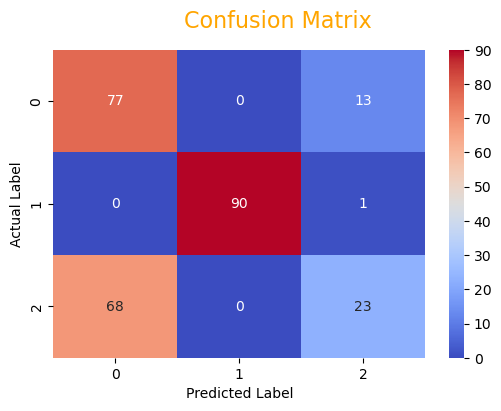

In [126]:
# Predicting the training dataset
y_preds = gnb.predict(X_train)
print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

cf_matrix = confusion_matrix(y_train, y_preds)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
fig.suptitle(t="Confusion Matrix",
             color="orange",
             fontsize=16);
ax.set(xlabel="Predicted Label",
       ylabel="Actual Label");

print(f"Accuracy Score:\n\n{accuracy_score(y_train, y_preds)*100:2f}%\n")

Classfifcation Report:

              precision    recall  f1-score   support

           0       0.53      0.75      0.62        24
           1       1.00      0.96      0.98        25
           2       0.45      0.25      0.32        20

    accuracy                           0.68        69
   macro avg       0.66      0.65      0.64        69
weighted avg       0.68      0.68      0.66        69



Accuracy Score:

68.115942%



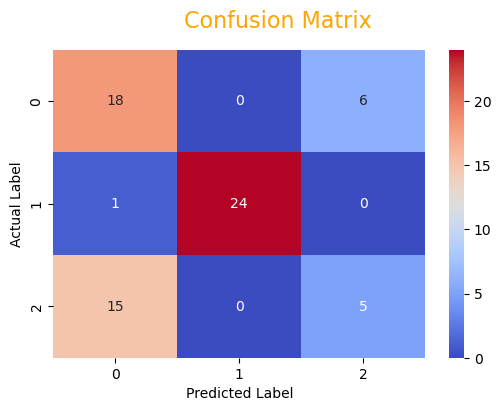

In [127]:
# Predicting the testing dataset
y_preds = gnb.predict(X_test)
print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

cf_matrix = confusion_matrix(y_test, y_preds)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
fig.suptitle(t="Confusion Matrix",
             color="orange",
             fontsize=16);
ax.set(xlabel="Predicted Label",
       ylabel="Actual Label");

print(f"Accuracy Score:\n\n{accuracy_score(y_test, y_preds)*100:2f}%\n")

#### df_ed dataset

In [67]:
df_ed1.head()

COUNTY  YEAR AGE GROUP  NUMBER OF ED VISITS  AGE-ADJUSTED ED VISIT RATE  \
1    Alameda  2015  All ages                 9939                        64.3   
3     Amador  2015  All ages                  196                        58.4   
4      Butte  2015  All ages                 1044                        50.2   
5  Calaveras  2015  All ages                  185                        48.0   
6     Colusa  2015  All ages                   97                        41.4   

   NUMERIC YEAR  NUMERIC AGE GROUP  
1             0                  0  
3             0                  0  
4             0                  0  
5             0                  0  
6             0                  0

##### We will try to predict the numeric age group labels(0: All Ages,1: 0-17 ,2: 18+, 3: 0-4, 4: 5-17, 5: 18-64, 6:65+)

In [65]:
X2 = df_ed1[['NUMBER OF ED VISITS', 'AGE-ADJUSTED ED VISIT RATE', 'NUMERIC YEAR']] # variables
y2 = df_ed1[['NUMERIC AGE GROUP']] #target variable

In [66]:
# Splitting the datasets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X2, y2,test_size=0.2) #80-20 split

In [56]:
X_train.head()

NUMBER OF ED VISITS  AGE-ADJUSTED ED VISIT RATE  NUMERIC YEAR
2495                   53                        34.6             3
3647                   88                        33.0             4
2665                 4144                        69.7             3
2669                   21                        41.6             3
2971                  384                        19.3             4

In [57]:
y_train.head()

NUMERIC AGE GROUP
2495                  6
3647                  0
2665                  0
2669                  0
2971                  2

In [69]:
X_test.head()

NUMBER OF ED VISITS  AGE-ADJUSTED ED VISIT RATE  NUMERIC YEAR
2415                   35                        56.3             3
2220                 3644                        44.7             3
183                    14                        87.5             0
827                  5651                        43.7             1
3472                   65                        22.2             4

In [70]:
y_test.head()

NUMERIC AGE GROUP
2415                  4
2220                  1
183                   3
827                   2
3472                  0

In [131]:
#Fitting the Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classfifcation Report:

              precision    recall  f1-score   support

           0       0.43      0.56      0.49      1194
           1       0.00      0.00      0.00       267
           2       0.27      0.13      0.18       264
           3       0.00      0.00      0.00       218
           4       0.00      0.00      0.00       249
           5       0.00      0.00      0.00       253
           6       0.21      0.89      0.35       234

    accuracy                           0.34      2679
   macro avg       0.13      0.23      0.14      2679
weighted avg       0.24      0.34      0.26      2679



Accuracy Score:

34.191863%



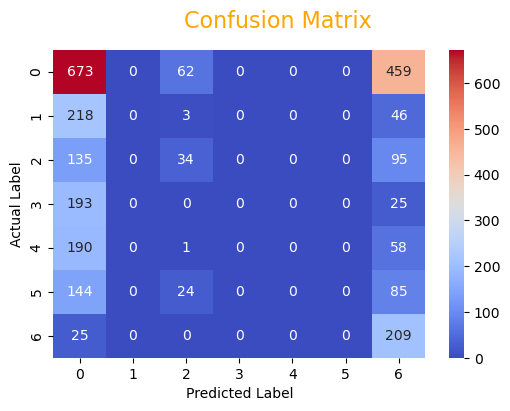

In [132]:
# Predicting the training dataset
y_preds = gnb.predict(X_train)
print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

cf_matrix = confusion_matrix(y_train, y_preds)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
fig.suptitle(t="Confusion Matrix",
             color="orange",
             fontsize=16);
ax.set(xlabel="Predicted Label",
       ylabel="Actual Label");

print(f"Accuracy Score:\n\n{accuracy_score(y_train, y_preds)*100:2f}%\n")

D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classfifcation Report:

              precision    recall  f1-score   support

           0       0.46      0.62      0.53       310
           1       0.00      0.00      0.00        55
           2       0.18      0.09      0.12        66
           3       0.00      0.00      0.00        56
           4       0.00      0.00      0.00        59
           5       0.00      0.00      0.00        77
           6       0.18      0.83      0.29        47

    accuracy                           0.36       670
   macro avg       0.12      0.22      0.14       670
weighted avg       0.24      0.36      0.28       670



Accuracy Score:

35.522388%



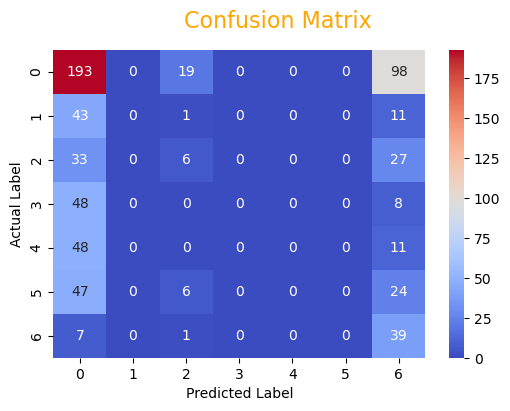

In [133]:
# Predicting the testing dataset
y_preds = gnb.predict(X_test)
print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

cf_matrix = confusion_matrix(y_test, y_preds)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
fig.suptitle(t="Confusion Matrix",
             color="orange",
             fontsize=16);
ax.set(xlabel="Predicted Label",
       ylabel="Actual Label");

print(f"Accuracy Score:\n\n{accuracy_score(y_test, y_preds)*100:2f}%\n")

## Decision Tree

In [141]:
from sklearn.tree import DecisionTreeClassifier

#### df_deaths dataset

In [197]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X1, y1,test_size=0.2)

In [198]:
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        91

    accuracy                           1.00       272
   macro avg       1.00      1.00      1.00       272
weighted avg       1.00      1.00      1.00       272



Accuracy Score:

100.000000%



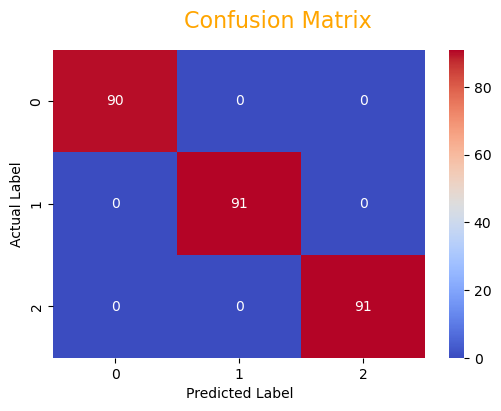

In [199]:
y_preds = dt.predict(X_train)
print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

cf_matrix = confusion_matrix(y_train, y_preds)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
fig.suptitle(t="Confusion Matrix",
             color="orange",
             fontsize=16);
ax.set(xlabel="Predicted Label",
       ylabel="Actual Label");

print(f"Accuracy Score:\n\n{accuracy_score(y_train, y_preds)*100:2f}%\n")

Classfifcation Report:

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       1.00      0.96      0.98        25
           2       0.70      0.80      0.74        20

    accuracy                           0.83        69
   macro avg       0.82      0.82      0.82        69
weighted avg       0.83      0.83      0.83        69



Accuracy Score:

82.608696%



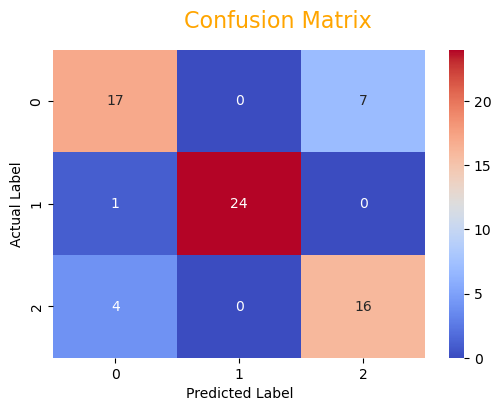

In [200]:
y_preds = dt.predict(X_test)
print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

cf_matrix = confusion_matrix(y_test, y_preds)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
fig.suptitle(t="Confusion Matrix",
             color="orange",
             fontsize=16);
ax.set(xlabel="Predicted Label",
       ylabel="Actual Label");

print(f"Accuracy Score:\n\n{accuracy_score(y_test, y_preds)*100:2f}%\n")

#### Visualize the trees with different depths

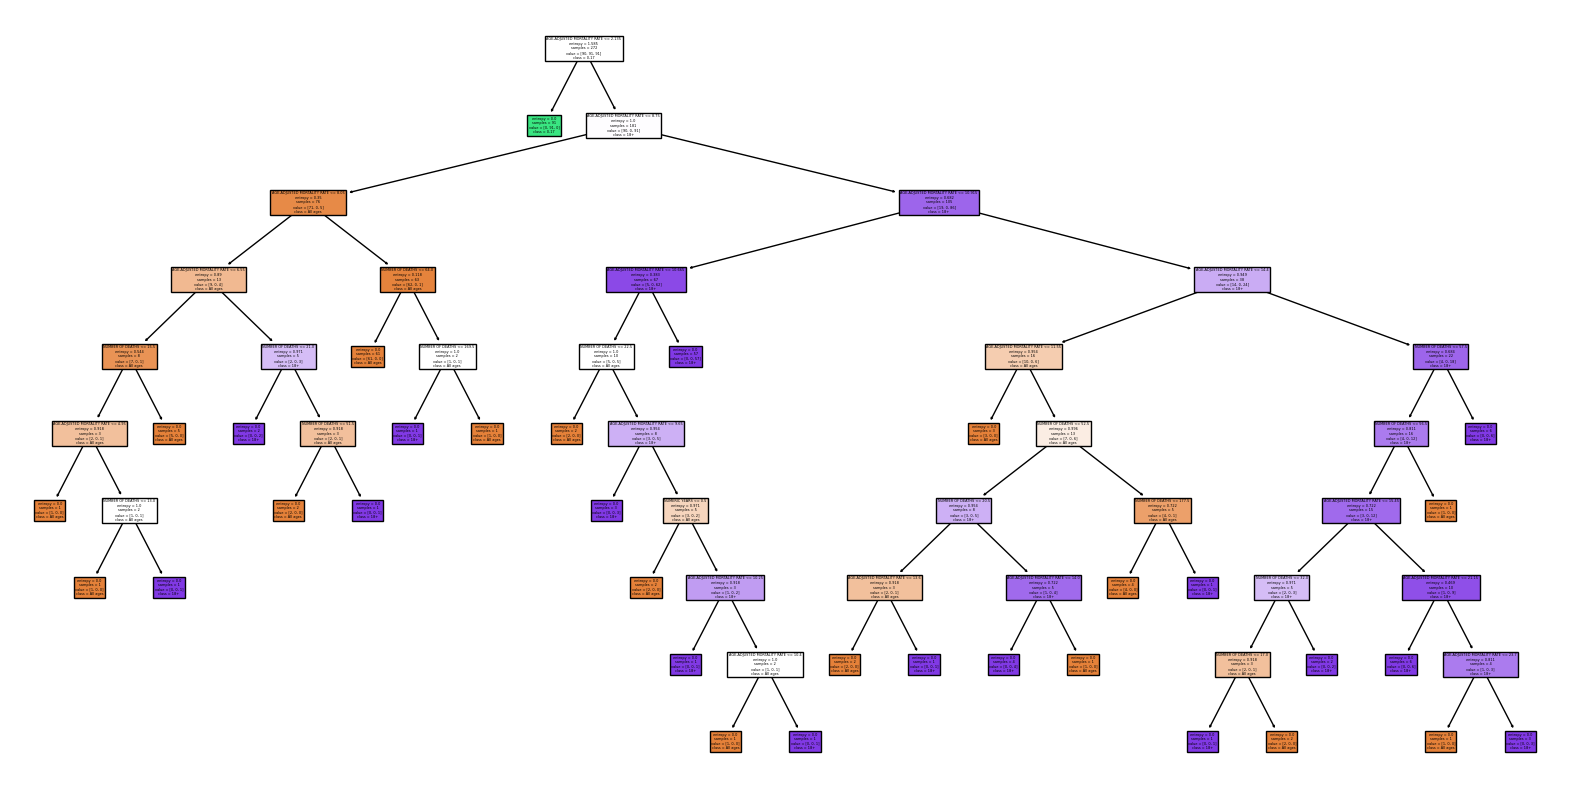

In [201]:
# original tree
from sklearn.tree import plot_tree

feature_names = list(X1.columns)
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=feature_names, class_names=['All ages', '0-17', '18+'])
plt.savefig("dt.jpg",dpi=1200)
plt.show()

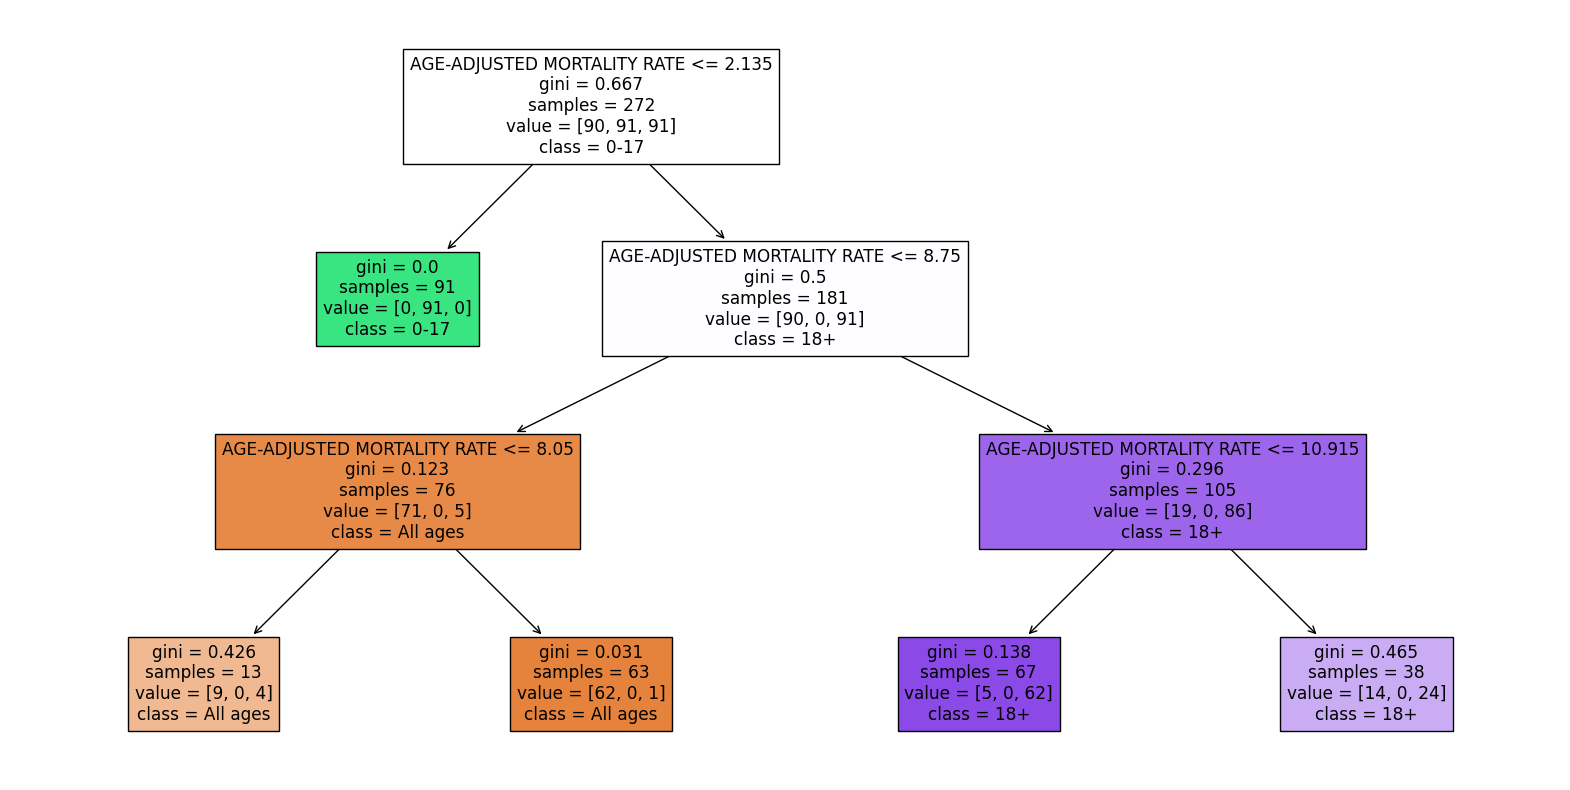

In [180]:
dt1 = DecisionTreeClassifier(criterion="gini",max_depth=3)
dt1.fit(X_train, y_train)

feature_names = list(X1.columns)
plt.figure(figsize=(20, 10))
plot_tree(dt1, filled=True, feature_names=feature_names, class_names=['All ages', '0-17', '18+'])
plt.savefig("dt1.jpg",dpi=1200)
plt.show()

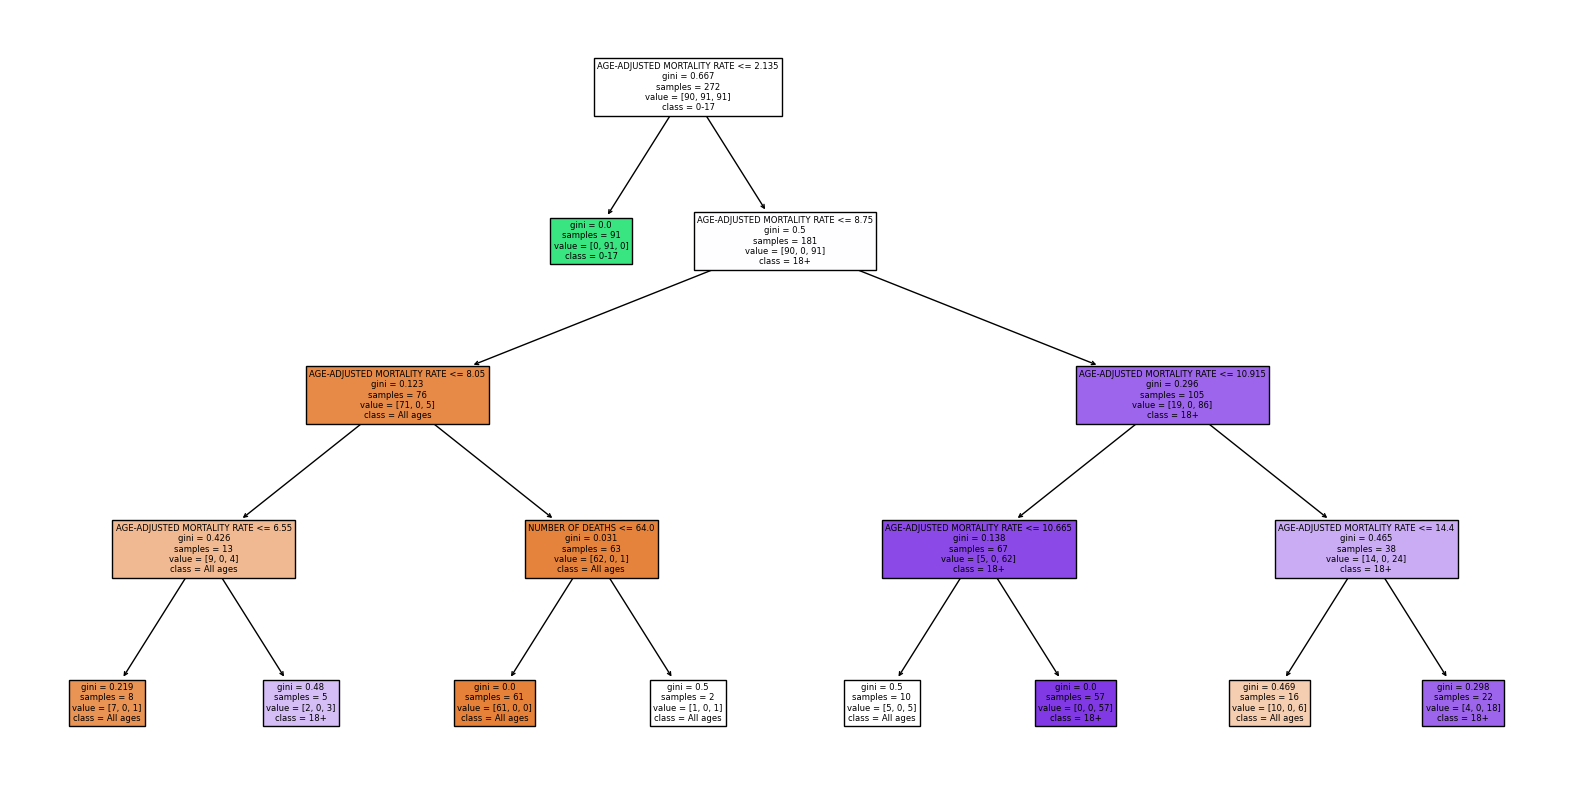

In [181]:
dt2 = DecisionTreeClassifier(criterion="gini",max_depth=4)
dt2.fit(X_train, y_train)

feature_names = list(X1.columns)
plt.figure(figsize=(20, 10))
plot_tree(dt2, filled=True, feature_names=feature_names, class_names=['All ages', '0-17', '18+'])
plt.savefig("dt2.jpg",dpi=1200)
plt.show()

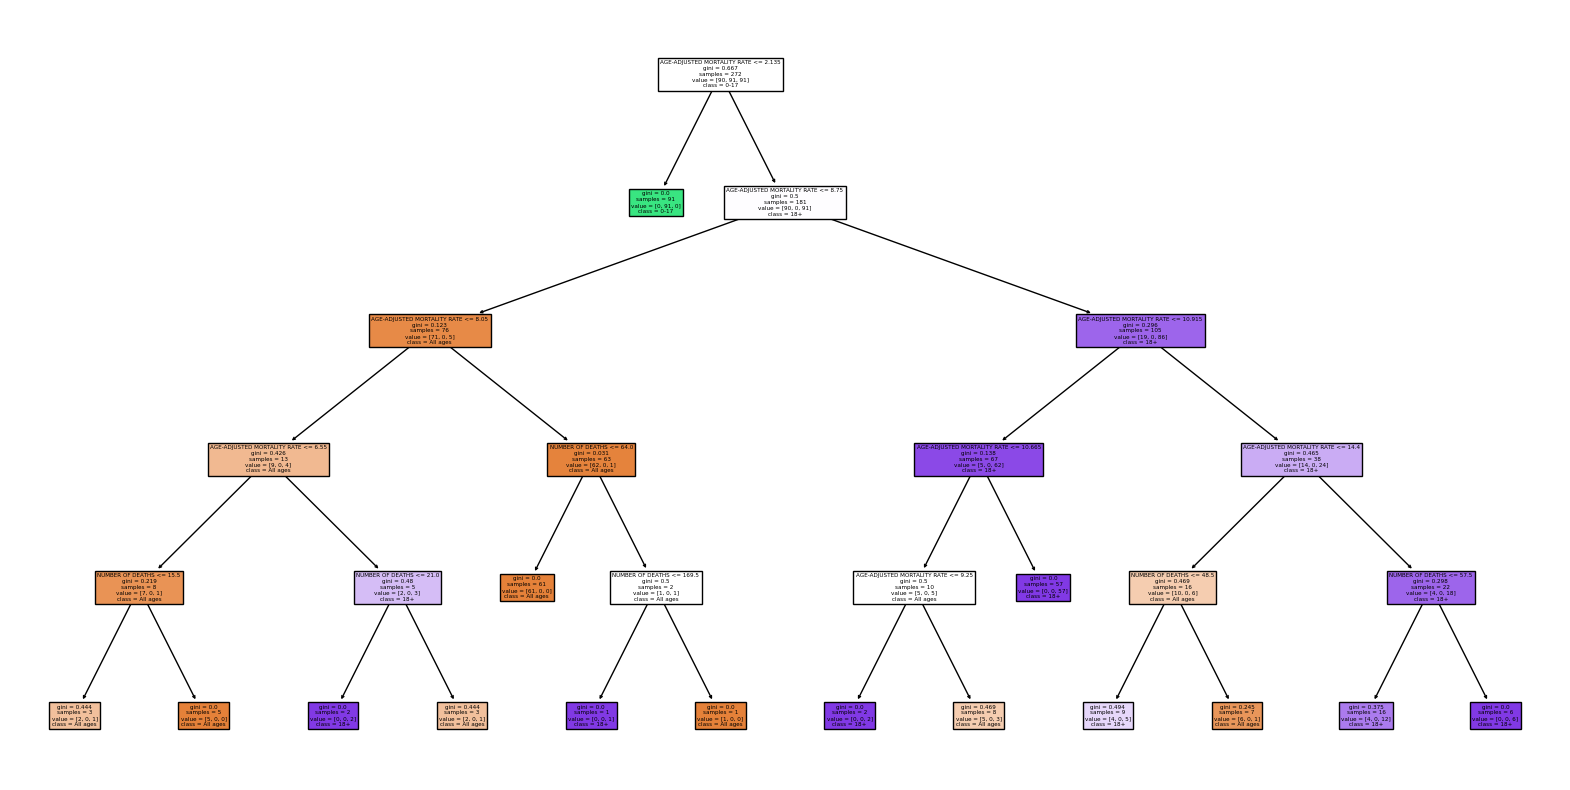

In [182]:
dt3 = DecisionTreeClassifier(criterion="gini",max_depth=5)
dt3.fit(X_train, y_train)

feature_names = list(X1.columns)
plt.figure(figsize=(20, 10))
plot_tree(dt3, filled=True, feature_names=feature_names, class_names=['All ages', '0-17', '18+'])
plt.savefig("dt3.jpg",dpi=1200)
plt.show()

#### df_ed dataset

In [185]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X2, y2,test_size=0.2)

In [186]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1194
           1       1.00      1.00      1.00       267
           2       1.00      1.00      1.00       264
           3       1.00      1.00      1.00       218
           4       1.00      1.00      1.00       249
           5       1.00      1.00      1.00       253
           6       1.00      1.00      1.00       234

    accuracy                           1.00      2679
   macro avg       1.00      1.00      1.00      2679
weighted avg       1.00      1.00      1.00      2679



Accuracy Score:

100.000000%



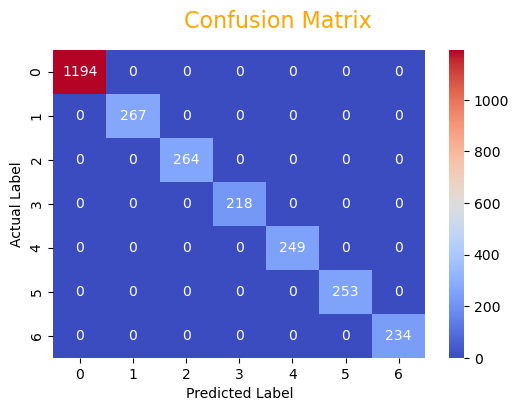

In [149]:
y_preds = dt.predict(X_train)
print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

cf_matrix = confusion_matrix(y_train, y_preds)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
fig.suptitle(t="Confusion Matrix",
             color="orange",
             fontsize=16);
ax.set(xlabel="Predicted Label",
       ylabel="Actual Label");

print(f"Accuracy Score:\n\n{accuracy_score(y_train, y_preds)*100:2f}%\n")

Classfifcation Report:

              precision    recall  f1-score   support

           0       0.50      0.49      0.49       310
           1       0.19      0.27      0.22        55
           2       0.19      0.20      0.19        66
           3       0.23      0.21      0.22        56
           4       0.22      0.24      0.23        59
           5       0.25      0.18      0.21        77
           6       0.35      0.36      0.35        47

    accuracy                           0.35       670
   macro avg       0.28      0.28      0.27       670
weighted avg       0.36      0.35      0.35       670



Accuracy Score:

35.223881%



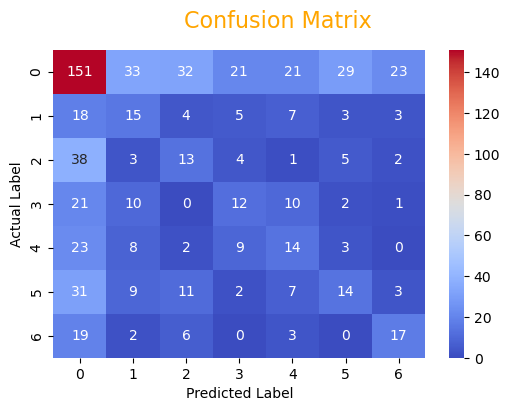

In [150]:
y_preds = dt.predict(X_test)
print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

cf_matrix = confusion_matrix(y_test, y_preds)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
fig.suptitle(t="Confusion Matrix",
             color="orange",
             fontsize=16);
ax.set(xlabel="Predicted Label",
       ylabel="Actual Label");

print(f"Accuracy Score:\n\n{accuracy_score(y_test, y_preds)*100:2f}%\n")

#### Visualizing the trees with different criterions

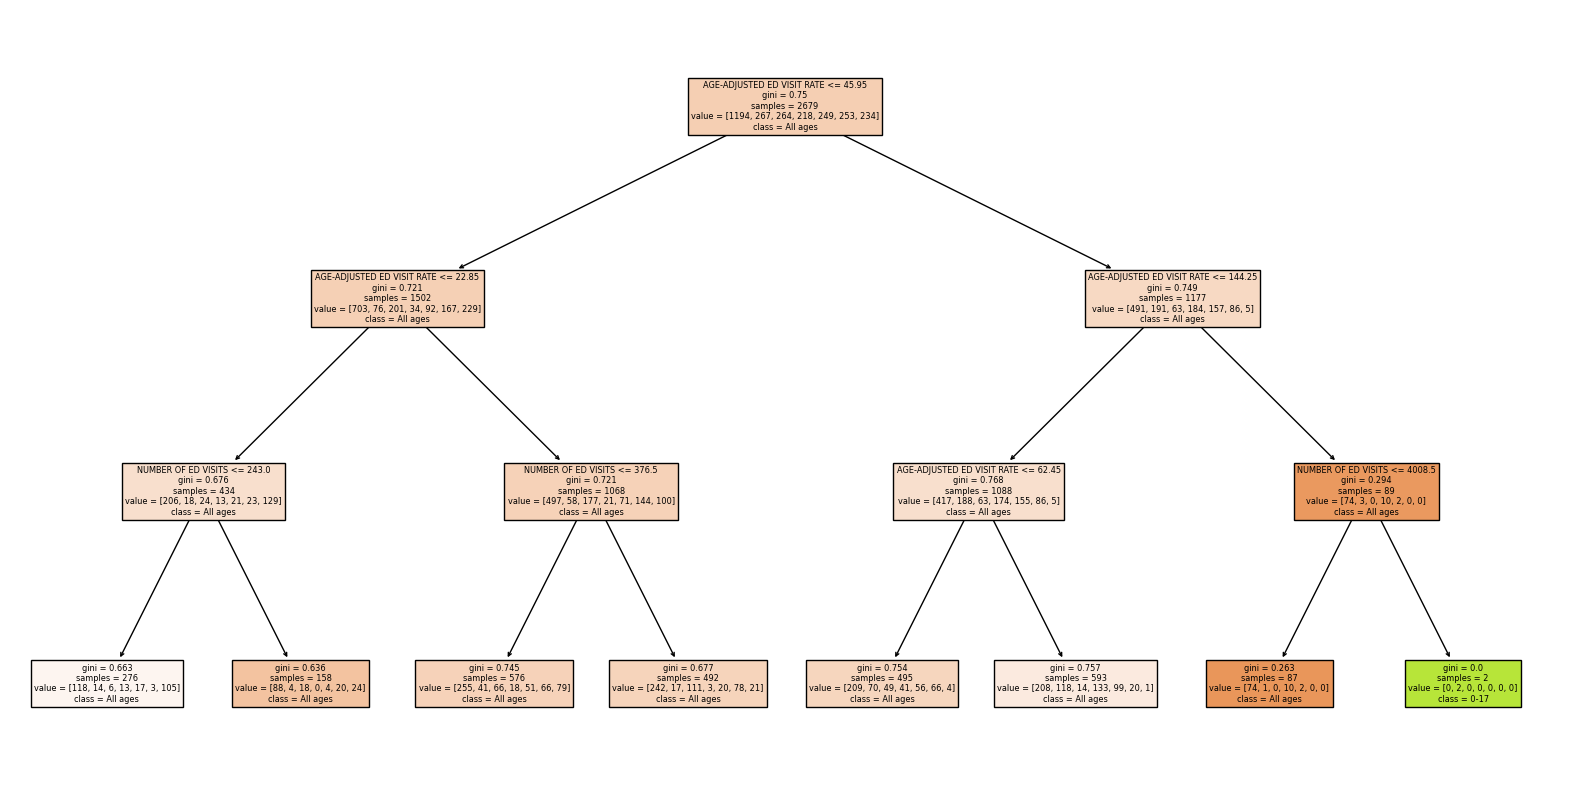

In [187]:
dt4 = DecisionTreeClassifier(criterion="gini",max_depth=3)
dt4.fit(X_train, y_train)

feature_names = list(X2.columns)
plt.figure(figsize=(20, 10))
plot_tree(dt4, filled=True, feature_names=feature_names, class_names=['All ages', '0-17', '18+', '0-4', '5-17', '18-64', '65+'])
plt.savefig("dt4.jpg",dpi=1200)
plt.show()

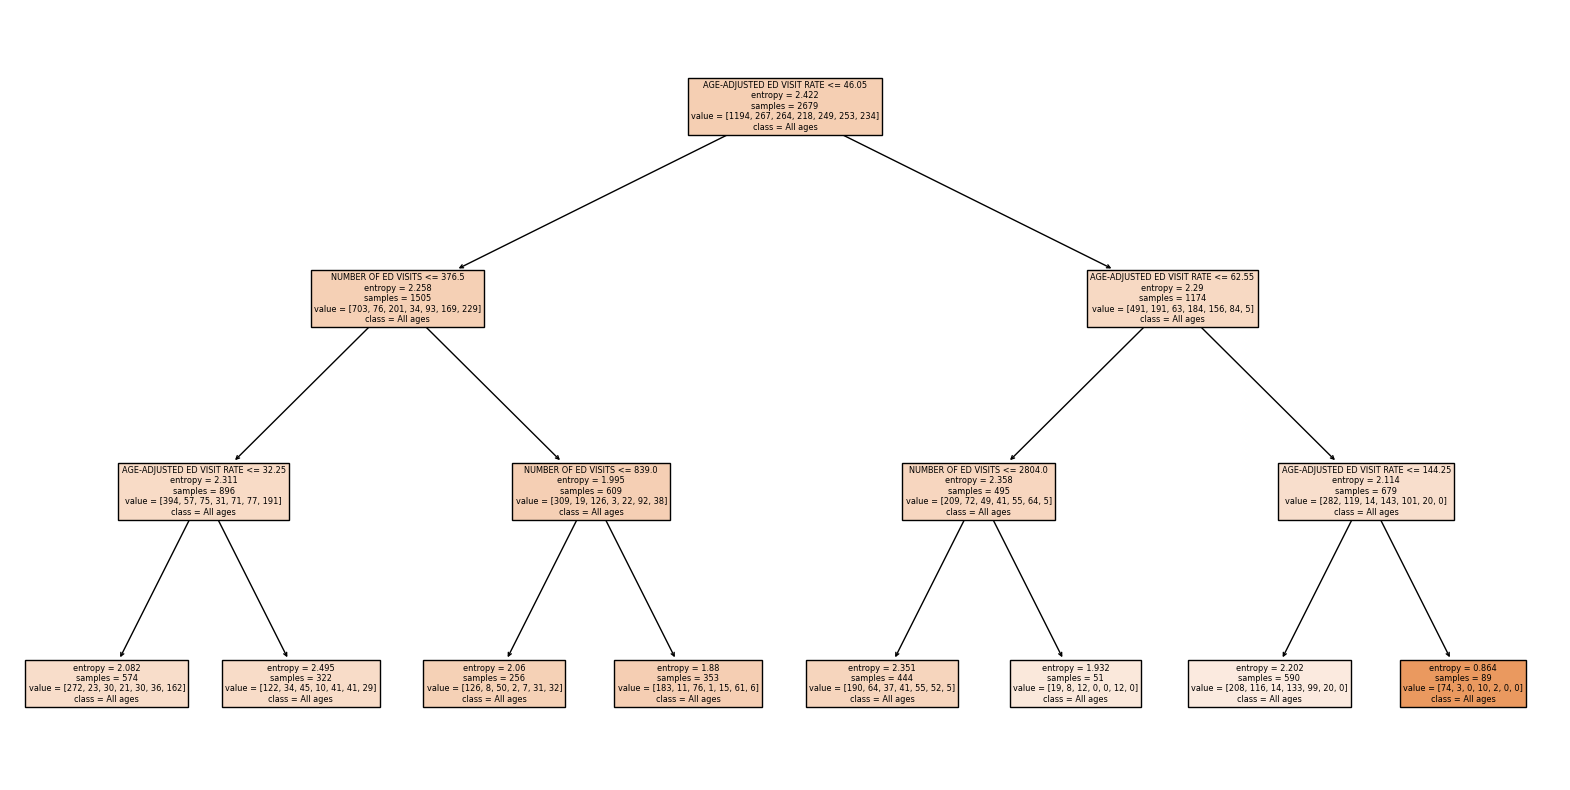

In [188]:
dt5 = DecisionTreeClassifier(criterion="entropy",max_depth=3)
dt5.fit(X_train, y_train)

feature_names = list(X2.columns)
plt.figure(figsize=(20, 10))
plot_tree(dt5, filled=True, feature_names=feature_names, class_names=['All ages', '0-17', '18+', '0-4', '5-17', '18-64', '65+'])
plt.savefig("dt5.jpg",dpi=1200)
plt.show()

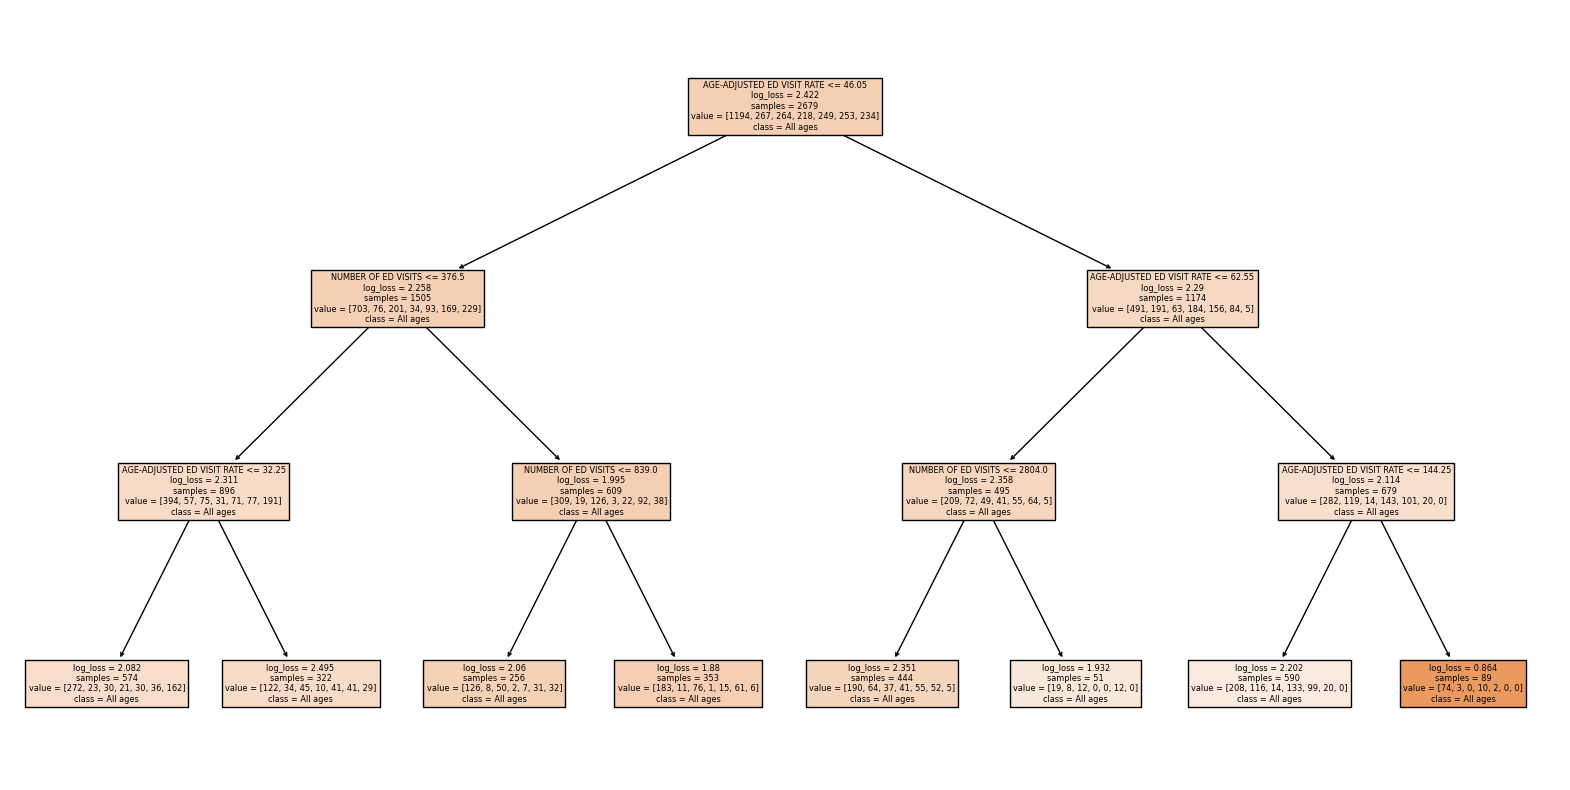

In [192]:
dt6 = DecisionTreeClassifier(criterion="log_loss",max_depth=3)
dt6.fit(X_train, y_train)

feature_names = list(X2.columns)
plt.figure(figsize=(20, 10))
plot_tree(dt6, filled=True, feature_names=feature_names, class_names=['All ages', '0-17', '18+', '0-4', '5-17', '18-64', '65+'])
plt.savefig("dt6.jpg",dpi=1200)
plt.show()

### SVMs

In [74]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

#### Tranforming random 2D to 3D points

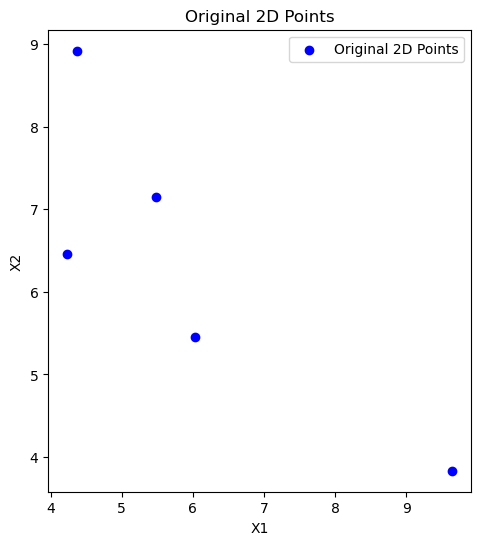

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate random 2D points
np.random.seed(0)
num_points = 5
X = np.random.rand(num_points, 2) * 10

# Define kernel functions
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x1, x2, degree=2):
    return (np.dot(x1, x2) + 1) ** degree

def rbf_kernel(x1, x2, gamma=0.1):
    return np.exp(-gamma * np.linalg.norm(x1 - x2) ** 2)

# Transform points using kernels
def transform_points(points, kernel):
    transformed_points = []
    for point in points:
        transformed_point = [kernel(point, X[i]) for i in range(num_points)]
        transformed_points.append(transformed_point)
    return np.array(transformed_points)

# Visualize original and transformed points
fig = plt.figure(figsize=(12, 6))

# Original 2D points
ax1 = fig.add_subplot(121)
ax1.scatter(X[:, 0], X[:, 1], c='b', label='Original 2D Points')
ax1.set_title('Original 2D Points')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.legend()

plt.show()

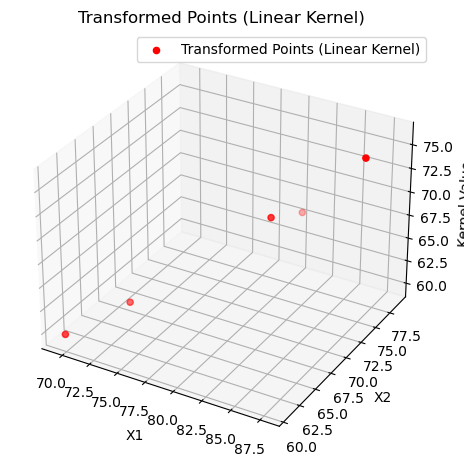

In [45]:
# Visualize original and transformed points
fig = plt.figure(figsize=(12, 6))

# Transformed 3D points using linear kernel
transformed_linear = transform_points(X, linear_kernel)
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(transformed_linear[:, 0], transformed_linear[:, 1], transformed_linear[:, 2], c='r', label='Transformed Points (Linear Kernel)')
ax2.set_title('Transformed Points (Linear Kernel)')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('Kernel Value')
ax2.legend()

plt.show()

##### df_deaths dataset

In [60]:
len(df_deaths1)

348

In [72]:
X1 = df_deaths1[['NUMBER OF DEATHS', 'AGE-ADJUSTED MORTALITY RATE', 'NUMERIC YEARS']] #variables
y1 = df_deaths1[['NUMERIC AGE GROUP']] #target
# Splitting the datasets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X1, y1,test_size=0.2) #80-20 split

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

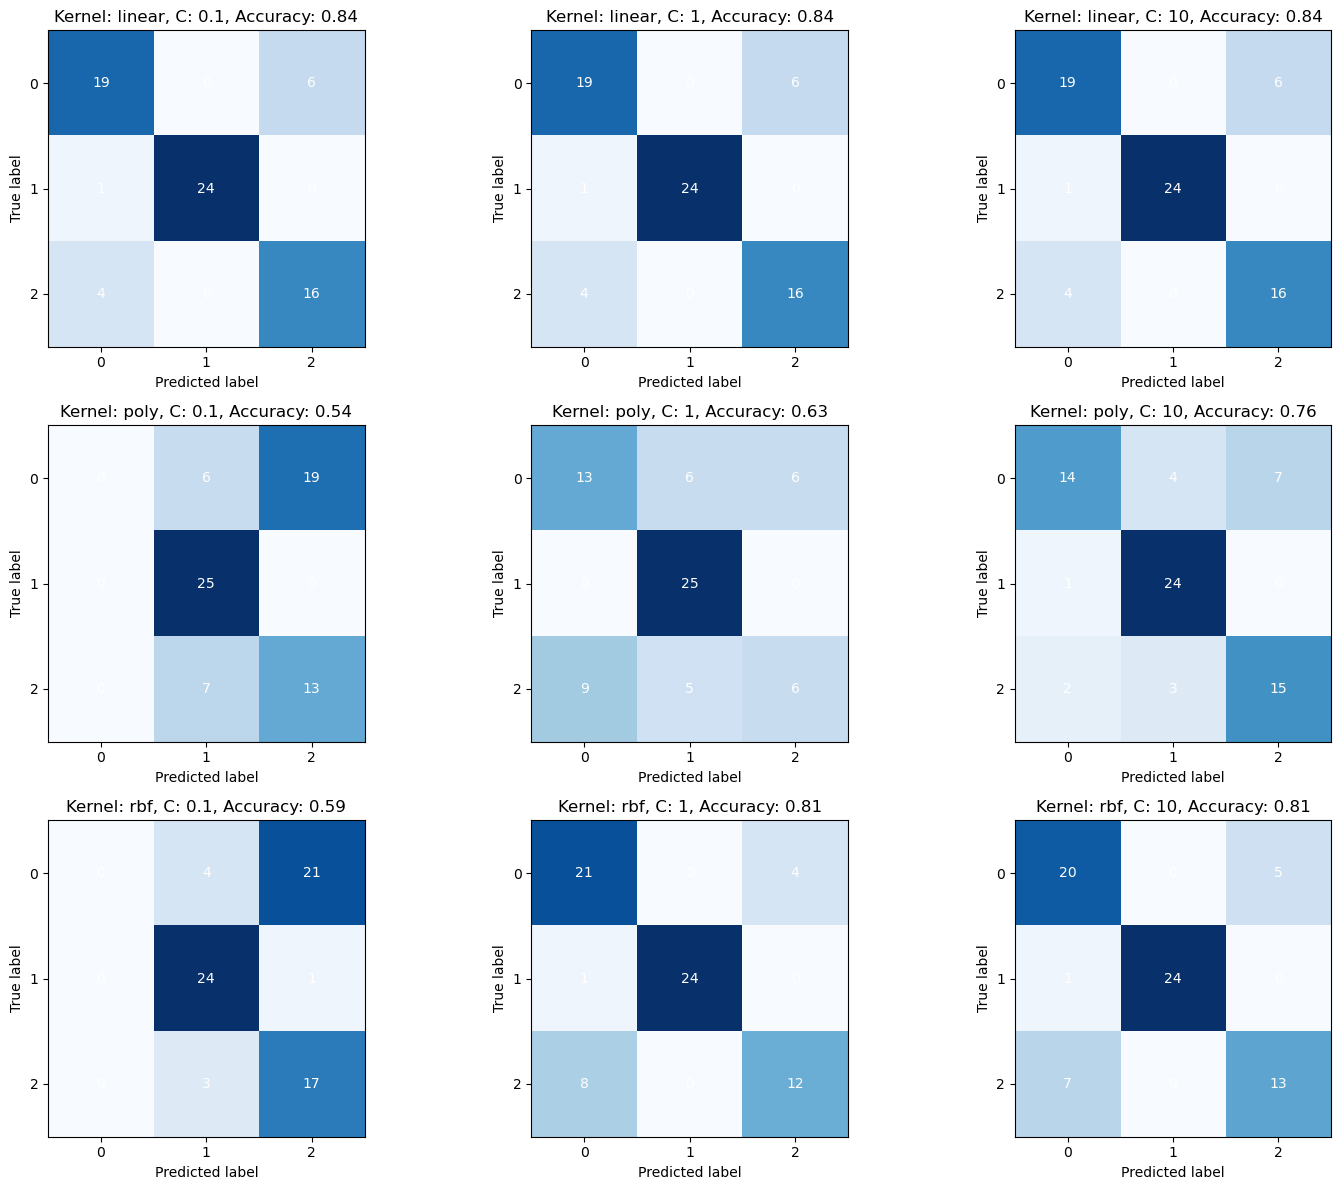

In [77]:
kernels = ['linear', 'poly', 'rbf'] # different Kernel values

C_values = [0.1, 1, 10] # different value of C

# Initialize subplots for confusion matrix visualization
fig, axs = plt.subplots(len(kernels), len(C_values), figsize=(15, 12))

for i, kernel in enumerate(kernels):
    for j, C in enumerate(C_values):
        # Train SVM model
        svm = SVC(kernel=kernel, C=C, random_state=42)
        svm.fit(X_train, y_train)

        # Predict on test data
        y_pred = svm.predict(X_test)

        # Calculate confusion matrix and accuracy
        cm = confusion_matrix(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)

        # Plot confusion matrix
        axs[i, j].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        axs[i, j].set_title(f'Kernel: {kernel}, C: {C}, Accuracy: {accuracy:.2f}')
        tick_marks = np.arange(len(np.unique(y1)))
        axs[i, j].set_xticks(tick_marks)
        axs[i, j].set_yticks(tick_marks)
        axs[i, j].set_xlabel('Predicted label')
        axs[i, j].set_ylabel('True label')
        axs[i, j].grid(False)
        for k in range(len(np.unique(y1))):
            for l in range(len(np.unique(y1))):
                axs[i, j].text(l, k, cm[k, l], ha='center', va='center', color='white')

# Adjust layout
plt.tight_layout()
plt.show()

In [82]:
from sklearn.metrics import classification_report

# Training the SVM model on C=0.1 and kernel as linear as it gave the best result
svm_linear = SVC(kernel='linear', C=0.1, random_state=42)
svm_linear.fit(X_train, y_train)

# Predict on test data
y_pred_linear = svm_linear.predict(X_test)

# Calculate accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy for (Linear Kernel, C=0.1):", accuracy_linear)

# Generate classification report
print("Classification Report (Linear Kernel, C=0.1):")
print(classification_report(y_test, y_pred_linear))

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for (Linear Kernel, C=0.1): 0.8428571428571429
Classification Report (Linear Kernel, C=0.1):
              precision    recall  f1-score   support

           0       0.79      0.76      0.78        25
           1       1.00      0.96      0.98        25
           2       0.73      0.80      0.76        20

    accuracy                           0.84        70
   macro avg       0.84      0.84      0.84        70
weighted avg       0.85      0.84      0.84        70



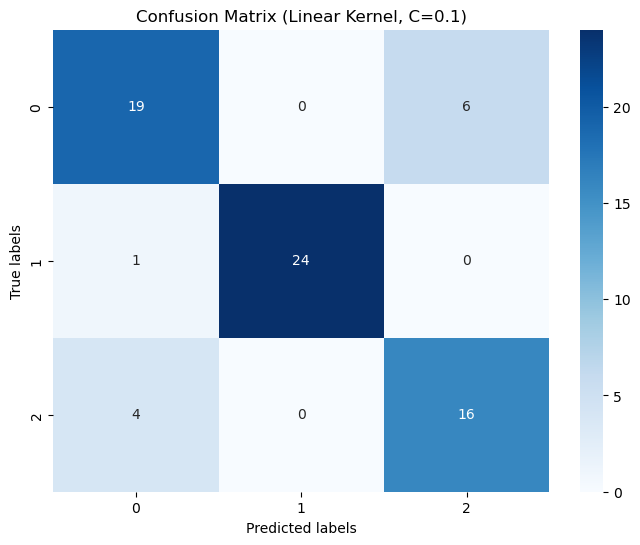

In [81]:
import seaborn as sns

# Generate confusion matrix
cm_linear = confusion_matrix(y_test, y_pred_linear)
print("Confusion Matrix for (Linear Kernel, C=0.1):")
print(cm_linear)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Linear Kernel, C=0.1)')
plt.show()

##### df_ed dataset

In [68]:
random_samples = df_ed1.sample(n=300, random_state=42)

In [69]:
len(random_samples)

300

In [70]:
random_samples.head()

COUNTY  YEAR  AGE GROUP  NUMBER OF ED VISITS  \
2306  Calaveras  2018  0-4 years                   15   
3298    Trinity  2019   All ages                   42   
1933     Shasta  2017   All ages                   30   
1560       Mono  2017  18+ years                   31   
3865     Orange  2020  0-4 years                  444   

      AGE-ADJUSTED ED VISIT RATE  NUMERIC YEAR  NUMERIC AGE GROUP  
2306                        82.3             3                  3  
3298                        47.4             4                  0  
1933                       192.8             2                  0  
1560                        32.1             2                  2  
3865                        24.2             5                  3

In [71]:
X2 = random_samples[['NUMBER OF ED VISITS', 'AGE-ADJUSTED ED VISIT RATE', 'NUMERIC YEAR']] # variables
y2 = random_samples[['NUMERIC AGE GROUP']] #target variable
# Splitting the datasets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X2, y2,test_size=0.2) #80-20 split

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

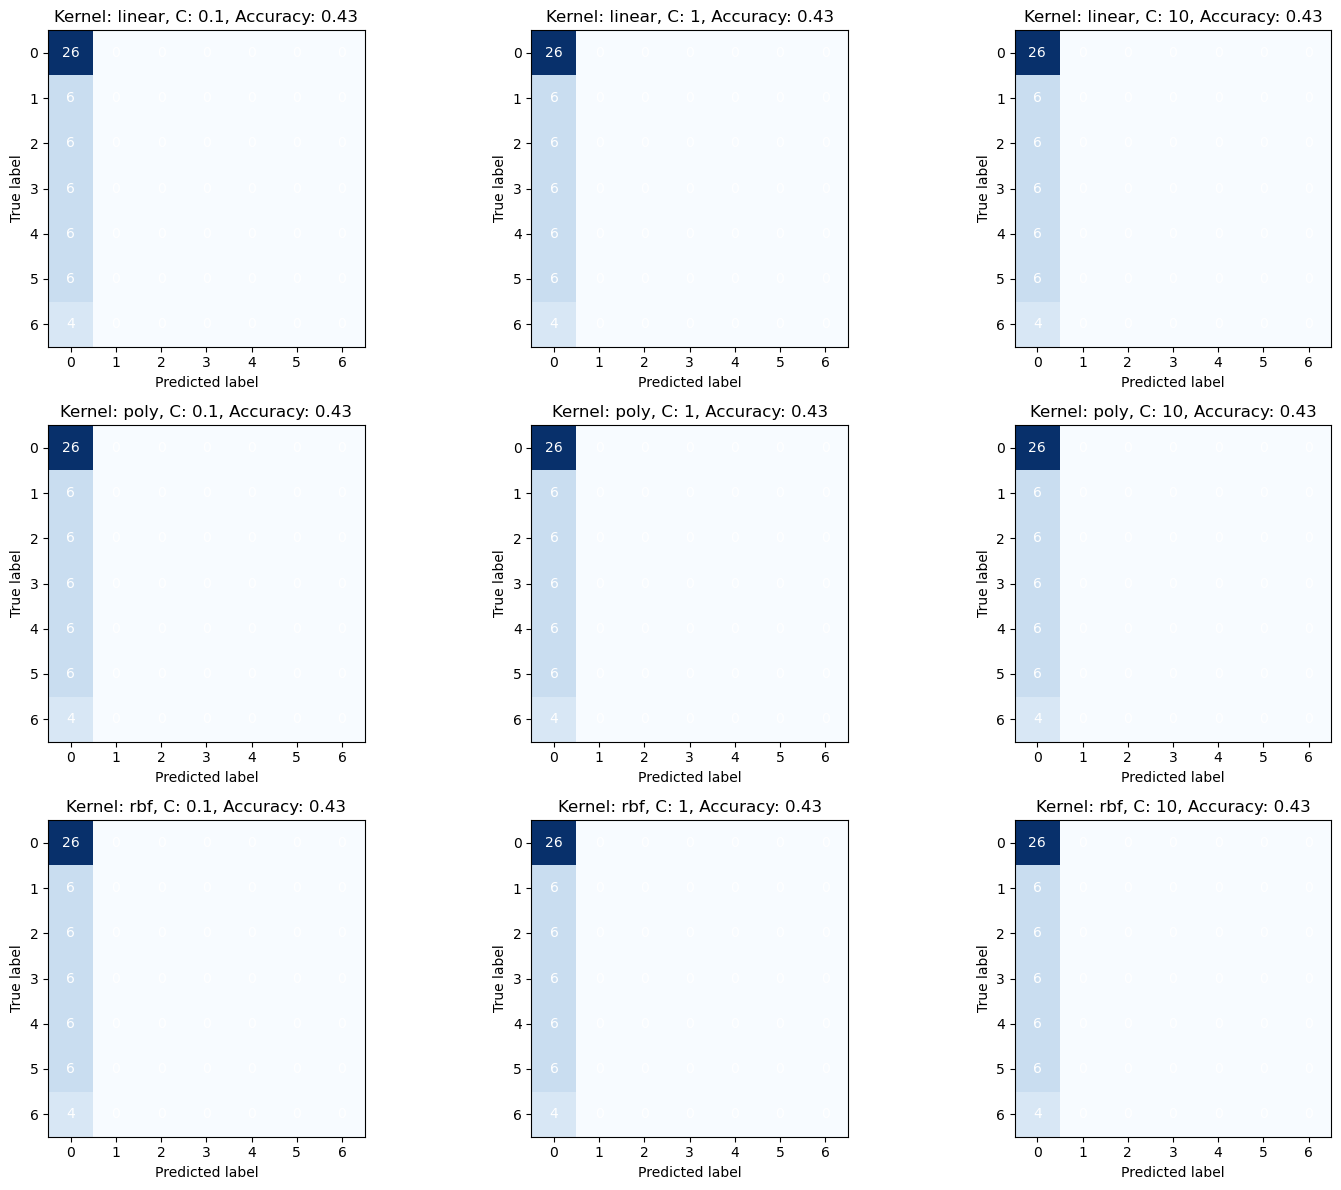

In [76]:
kernels = ['linear', 'poly', 'rbf'] # different Kernel values

C_values = [0.1, 1, 10] # different value of C

# Initialize subplots for confusion matrix visualization
fig, axs = plt.subplots(len(kernels), len(C_values), figsize=(15, 12))

for i, kernel in enumerate(kernels):
    for j, C in enumerate(C_values):
        # Train SVM model
        svm = SVC(kernel=kernel, C=C, random_state=42)
        svm.fit(X_train, y_train)

        # Predict on test data
        y_pred = svm.predict(X_test)

        # Calculate confusion matrix and accuracy
        cm = confusion_matrix(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)

        # Plot confusion matrix
        axs[i, j].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        axs[i, j].set_title(f'Kernel: {kernel}, C: {C}, Accuracy: {accuracy:.2f}')
        tick_marks = np.arange(len(np.unique(y2)))
        axs[i, j].set_xticks(tick_marks)
        axs[i, j].set_yticks(tick_marks)
        axs[i, j].set_xlabel('Predicted label')
        axs[i, j].set_ylabel('True label')
        axs[i, j].grid(False)
        for k in range(len(np.unique(y2))):
            for l in range(len(np.unique(y2))):
                axs[i, j].text(l, k, cm[k, l], ha='center', va='center', color='white')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Training the SVM model on C=0.1 and kernel as linear as it gave the best result
svm_linear = SVC(kernel='linear', C=0.1, random_state=42)
svm_linear.fit(X_train, y_train)

# Predict on test data
y_pred_linear = svm_linear.predict(X_test)

# Calculate accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy for (Linear Kernel, C=0.1):", accuracy_linear)

# Generate classification report
print("Classification Report (Linear Kernel, C=0.1):")
print(classification_report(y_test, y_pred_linear))

In [ ]:
import seaborn as sns

# Generate confusion matrix
cm_linear = confusion_matrix(y_test, y_pred_linear)
print("Confusion Matrix for (Linear Kernel, C=0.1):")
print(cm_linear)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Linear Kernel, C=0.1)')
plt.show()